In [3]:
import pandas as pd

In [318]:
import dill

# Path to where you want to save the session
session_path = r"D:\My_projects\Drug Use\capstone\workspace.pkl"

# Save all variables, dataframes, models, etc.
dill.dump_session(session_path)

print(f"✅ Session saved successfully to: {session_path}")


✅ Session saved successfully to: D:\My_projects\Drug Use\capstone\workspace.pkl


In [1]:
import os
os.chdir('D://My_projects//Drug Use//capstone')
import dill
dill.load_session('workspace.pkl')


## Data, Independent variables, Wave I

In [251]:
import os
os.chdir("D://My_projects//Drug Use//ICPSR_21600-V25//ICPSR_21600//DS0001")

In [253]:
file_path="21600-0001-Data.tsv"

In [255]:
df = pd.read_csv(file_path, sep='\t', low_memory=False)

In [1080]:
'BIO_SEX' in df

True

In [64]:
df.describe()

,IMONTH,IDAY,IYEAR,SCH_YR,BIO_SEX,SMP01,SMP03,H1GI1M,H1GI1Y,H1GI2,...,H1WS4G,H1WS5G,H1WS6G,H1WS7G,H1WS8G,H1WS9G,H1WS10G,H1WS11G,H1WS12G,H1WS13
count,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,6504.000000,...,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.0,6504.000000
mean,6.577645,15.735855,94.999846,0.354397,1.516759,0.933579,0.079951,6.604090,78.970941,0.542589,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.038130
std,1.403560,8.708040,0.012400,0.483165,0.502825,0.249035,0.271238,3.905455,1.809704,0.575287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.706785
min,1.000000,1.000000,94.000000,0.000000,1.000000,0.000000,0.000000,1.000000,74.000000,0.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.000000
25%,5.000000,8.000000,95.000000,0.000000,1.000000,1.000000,0.000000,4.000000,78.000000,0.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000
50%,6.000000,15.000000,95.000000,0.000000,2.000000,1.000000,0.000000,7.000000,79.000000,1.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000
75%,8.000000,23.000000,95.000000,1.000000,2.000000,1.000000,0.000000,9.000000,80.000000,1.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,1.000000
max,12.000000,31.000000,95.000000,6.000000,6.000000,1.000000,1.000000,96.000000,96.000000,8.000000,...,7.0,97.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,9.000000


In [66]:
df.isna().sum()

AID       0
IMONTH    0
IDAY      0
IYEAR     0
SCH_YR    0
         ..
PD4F      0
PD5       0
PD5A      0
AH_PVT    0
AH_RAW    0
Length: 2794, dtype: int64

In [1100]:
df['IMONTH'].dtype


dtype('int64')

In [1114]:
## people refused to answer if they were born in the united states!!!! a lot!!! therefore not born?? also refused to answer about their race!

In [70]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("\nMissing value ratio (top 10):")
print(df.isna().mean().sort_values(ascending=False).head(10))


Rows: 6504
Columns: 2794

Missing value ratio (top 10):
AID       0.0
H1FV13    0.0
H1FV5     0.0
H1FV6     0.0
H1FV7     0.0
H1FV8     0.0
H1FV9     0.0
H1FV10    0.0
H1FV11    0.0
H1FV12    0.0
dtype: float64


## Target Variables, Wave IV

In [1121]:
import os
os.chdir("D://My_projects//Drug Use//ICPSR_21600-V25//ICPSR_21600//DS0022")
file_path_2="21600-0022-Data.tsv"

In [1123]:
df_2= pd.read_csv(file_path_2, sep='\t', low_memory=False)

In [1124]:
# Check that both have AID
print('AID' in filtered_df.columns)
print('AID' in df_2.columns)


True
True


In [72]:
df1=df.copy()

In [76]:
#merge the target variables with the indepemndent variables, age at first drink, number of drinking days in the past year,number of times he drinks at peak, numbr of drinks
df1['AID'] = df1['AID'].astype(str)
df_2['AID'] = df_2['AID'].astype(str)
df1 = df1.merge(
    df_2[['AID','H4TO34', 'H4TO35','H4TO36','H4TO44' ,'H4TO45']],
    on='AID',
    how='left'
)


In [78]:
df1[['H4TO34', 'H4TO35','H4TO36','H4TO44','H4TO45']].info()
df1[['H4TO34', 'H4TO35','H4TO36','H4TO44','H4TO45']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H4TO34  5114 non-null   float64
 1   H4TO35  5114 non-null   float64
 2   H4TO36  5114 non-null   float64
 3   H4TO44  5114 non-null   float64
 4   H4TO45  5114 non-null   float64
dtypes: float64(5)
memory usage: 254.2 KB


,H4TO34,H4TO35,H4TO36,H4TO44,H4TO45
0,NaN,NaN,NaN,NaN,NaN
1,16.0,2.0,10.0,97.0,97.0
2,NaN,NaN,NaN,NaN,NaN
3,97.0,97.0,97.0,97.0,97.0
4,NaN,NaN,NaN,NaN,NaN


In [80]:
matched = df1['H4TO44'].notna().sum()
print(f"{matched} respondents had drinking data merged successfully.")


5114 respondents had drinking data merged successfully.


In [82]:
print(df1.shape)
df1['AID'].nunique()


(6504, 2799)


6504

In [84]:
#description for dependent variables
df1[['H4TO34', 'H4TO35']].describe()
df1[['H4TO34', 'H4TO35']].value_counts(dropna=False)


H4TO34  H4TO35
NaN     NaN       1390
97.0    97.0      1027
16.0    4.0        189
15.0    4.0        146
16.0    3.0        132
                  ... 
25.0    1.0          1
9.0     3.0          1
25.0    3.0          1
12.0    98.0         1
9.0     1.0          1
Name: count, Length: 168, dtype: int64

In [88]:
#remove missing data
targets = ['H4TO34', 'H4TO35', 'H4TO44', 'H4TO45']

df1 = df1.dropna(subset=targets, how='all')


In [90]:
df1.shape

(5114, 2799)

## EDA

In [1142]:
#import weights dataset
import os
os.chdir("D://My_projects//Drug Use//ICPSR_21600-V25//ICPSR_21600//DS0031")
file_path_W="21600-0031-Data.tsv"
df_W = pd.read_csv(file_path_W, sep='\t', low_memory=False)

In [231]:
# merge the weight variable
df_W['AID'] = df_W['AID'].astype(str)
df1 = df1.merge(
    df_W[['AID', 'GSWGT134']],
    on='AID',
    how='left'
)


In [96]:
df1['GSWGT134'].isna().sum()


0

In [98]:
df1['GSWGT134'].describe()


count     5114
unique    1606
top           
freq       906
Name: GSWGT134, dtype: object

## Univariate Analysis

In [284]:
#varrename
var_labels = {
    # 'PeakTotalDrinksIndex_upper' dependent variable
    'H1GI8' :'Race',
    'H4TO34': 'Age at First Drink',
    'H4TO35': 'Drinking Days (Past Year)',
    'H4TO36': 'Drinks per Occasion (Past Year)',
    'H4TO44': 'Times Drank Alcohol (Peak Year)',
    'H4TO45': 'Drinks per Occasion (Peak Year)',
    'H1GI3':'Age when Moved to Current Residence',
    'H1GI1Y':'BirthYear',
    'H1GH51':'Hours of Sleep', 
    'H1ED16':'Trouble Paying Attention',
    'H1RE1':'ReligionGroup',
    'H1RE4':'LowReligiousImportance',#
    'H1ED2':'TimesSkippedSchool',
    'H1ED19':'SchoolCloseness',#
    'H1ED7':'SchoolSuspension',
    'H1ED9':'SchoolExpulsion',# along with h1ed7 they make 'DisciplinaryIndex'#
    'H1TO29':'peer_alcohol_any'
    #'SchoolTrouble_Index'#
    #GPA_Index
    #ParentalWarmth_Index#
    #ParentalSupervision_Index#
    ###Psychological
    #BluesInspiteOfHelp
    #LessThanOthers
    #'Unhappy', 
    #'Lonely', 
    #'UnfriendlyPeople', 
    #'HardToStart', 
    #'NotWorthLiving'
    

}
df1 = df1.rename(columns=var_labels)

In [102]:
#target variables
targets = ['Age at First Drink',
     'Drinking Days (Past Year)',
           'Drinks per Occasion (Past Year)',
     'Drinks per Occasion (Peak Year)',
      'Times Drank Alcohol (Peak Year)']
weight = 'GSWGT134'


In [104]:
import numpy as np
import pandas as pd

def weighted_mean(x, w):
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=w[mask])

def weighted_median(x, w):
    mask = ~np.isnan(x)
    x, w = x[mask], w[mask]
    srt = np.argsort(x)
    x, w = x[srt], w[srt]
    cum_w = np.cumsum(w)
    cutoff = w.sum() / 2
    return x[np.searchsorted(cum_w, cutoff)]


In [134]:
import numpy as np
import pandas as pd

# === H4TO44: "During the period when you drank the most, how often did you usually drink?" ===
days_ranges = {
    1: (0, 1),       # less than 1 day a month
    2: (1, 1),       # 1 day a month
    3: (2, 3),       # 2–3 days a month
    4: (4, 4),       # 1 day a week
    5: (8, 8),       # 2 days a week
    6: (12, 20),     # 3–5 days a week
    7: (25, 30),     # every day or almost every day
    95: None, 96: None, 97: None, 98: None  # refused/don’t know/invalid
}

# === H4TO45: "During that period, on the days you drank, how many drinks did you usually have?" ===
drinks_ranges = {
    1: (1, 1),       # 1 drink
    2: (2, 2),       # 2 drinks
    3: (3, 3),       # 3 drinks
    4: (4, 4),       # 4 drinks
    5: (5, 5),       # 5 drinks
    6: (6, 16),      # range given in codebook (6–16)
    17: (17, 17),    # 17 drinks
    18: (18, 18),    # 18 drinks
    96: None, 97: None, 98: None            # refused/don’t know/invalid
}
age_first_drink_map = {
    5: (5, 5),
    6: (6, 6),
    7: (7, 7),
    8: (8, 8),
    9: (9, 9),
    10: (10, 29),   # range explicitly noted in codebook
    30: (30, 30),
    33: (33, 33),
    96: None,       # refused
    97: None,       # legitimate skip
    98: None        # don't know
}

# Apply the mapping
df1['AgeFirstDrinkTuple'] = df1['Age at First Drink'].map(age_first_drink_map)

# Apply the mapping
df1['DaysTuplePeak']   = df1[ 'Times Drank Alcohol (Peak Year)'].map(days_ranges)
df1['DrinksTuplePeak'] = df1['Drinks per Occasion (Peak Year)'].map(drinks_ranges)
df1['DrinkingDaysTuple']   = df1[ 'Drinking Days (Past Year)'].map(days_ranges)
df1['DrinksTuple'] = df1['Drinks per Occasion (Past Year)'].map(drinks_ranges)
# Quick preview
print(df1[['Drinks per Occasion (Peak Year)', 'DaysTuplePeak', 'Drinks per Occasion (Peak Year)', 'DrinksTuplePeak']].head(10))


   Drinks per Occasion (Peak Year) DaysTuplePeak  \
0                             97.0          None   
1                             97.0          None   
2                              6.0      (25, 30)   
3                             97.0          None   
4                             97.0          None   
5                             97.0          None   
6                             97.0          None   
7                              2.0        (2, 3)   
8                              6.0      (12, 20)   
9                              2.0        (0, 1)   

   Drinks per Occasion (Peak Year) DrinksTuplePeak  
0                             97.0            None  
1                             97.0            None  
2                              6.0         (6, 16)  
3                             97.0            None  
4                             97.0            None  
5                             97.0            None  
6                             97.0            None  
7  

In [136]:
import numpy as np
import pandas as pd

# --- Variables ---
tuple_vars = [
    'DaysTuplePeak',
    'DrinksTuplePeak',
    'DrinkingDaysTuple',
    'DrinksTuple',
    'AgeFirstDrinkTuple'
]

weight = 'GSWGT134'

# Ensure numeric weights
df1[weight] = pd.to_numeric(df1[weight], errors='coerce')

results = []

# --- Helper functions ---
def get_min(t):
    return t[0] if isinstance(t, tuple) else np.nan

def get_max(t):
    return t[1] if isinstance(t, tuple) else np.nan

# --- Loop over tuple variables ---
for var in tuple_vars:
    # Extract numeric min and max
    filtered_df[f'{var}_min'] = filtered_df[var].apply(get_min)
    filtered_df[f'{var}_max'] = filtered_df[var].apply(get_max)
    
    # Weighted averages
    for bound in ['min', 'max']:
        col = f'{var}_{bound}'
        temp = filtered_df[[col, weight]].dropna()
        if len(temp) == 0 or temp[weight].sum() == 0:
            mean_val = np.nan
        else:
            mean_val = np.average(temp[col], weights=temp[weight])
        
        # Save temporarily
        if bound == 'min':
            mean_min = mean_val
            valid_n = len(temp)
        else:
            mean_max = mean_val

    missing_ = filtered_df[var].isna().mean() * 100

    results.append({
        'Variable': var,
        'Weighted Mean (min)': round(mean_min, 2),
        'Weighted Mean (max)': round(mean_max, 2),
        'Missing %': round(missing_, 1),
        'Valid N': valid_n
    })

# --- Create summary DataFrame ---
summary_tuples = pd.DataFrame(results)
print(summary_tuples)


             Variable  Weighted Mean (min)  Weighted Mean (max)  Missing %  \
0       DaysTuplePeak                11.80                15.88       54.2   
1     DrinksTuplePeak                 4.77                 6.83       68.4   
2   DrinkingDaysTuple                 3.17                 3.81       28.3   
3         DrinksTuple                 3.21                 4.12       36.4   
4  AgeFirstDrinkTuple                 8.75                14.94       97.4   

   Valid N  
0     1945  
1     1357  
2     3033  
3     2705  
4      107  


In [138]:
#race
var = 'Race'      
weight = 'GSWGT134'
df1[weight] = pd.to_numeric(df1[weight], errors='coerce')

# Drop rows missing the variable or weight
df = df1[[var, weight]].dropna()

# Weighted counts per category
weighted_freq = (
    df1.groupby(var, as_index=False)[weight]
      .sum()
      .rename(columns={weight: 'Weighted_N'})
)
# Ensure weight is numeric
weighted_freq['Weighted_N'] = pd.to_numeric(weighted_freq['Weighted_N'], errors='coerce')
# Weighted percentage
weighted_freq['Weighted_%'] = (
    weighted_freq['Weighted_N'] / weighted_freq['Weighted_N'].sum() * 100
)

print(weighted_freq.sort_values('Weighted_%', ascending=False))


   Race    Weighted_N  Weighted_%
6     7  2.094828e+07   95.628904
0     1  4.646366e+05    2.121066
1     2  1.961568e+05    0.895456
2     3  1.384074e+05    0.631830
4     5  7.510544e+04    0.342856
3     4  4.675748e+04    0.213448
7     8  2.841004e+04    0.129692
5     6  4.777342e+03    0.021809
8     9  3.272786e+03    0.014940


1 White/
2 Black or African American/
3 American Indian or Native American/
4 Asian or Pacific Islander

In [140]:
print(df1[weight].describe())
print("Non-missing weights:", df1[weight].notna().sum())


count     4208.000000
mean      5205.752376
std       3032.693527
min        303.206328
25%       3352.976969
50%       5003.206030
75%       6560.325154
max      30769.556450
Name: GSWGT134, dtype: float64
Non-missing weights: 4208


In [143]:
#Birth Year
var = 'BirthYear'     # or 'H1GI1Y' if not renamed yet
weight = 'GSWGT134'

df = df1[[var, weight]].dropna()
x = df[var].astype(float).to_numpy()
w = df[weight].astype(float).to_numpy()


In [145]:
import numpy as np

def weighted_mean(x, w):
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=w[mask])

def weighted_median(x, w):
    mask = ~np.isnan(x)
    x, w = x[mask], w[mask]
    srt = np.argsort(x)
    x, w = x[srt], w[srt]
    cum_w = np.cumsum(w)
    cutoff = w.sum() / 2
    return x[np.searchsorted(cum_w, cutoff)]

mean_ = weighted_mean(x, w)
median_ = weighted_median(x, w)
missing_ = df1[var].isna().mean() * 100

print(f"{var} – Weighted mean: {mean_:.1f}, median: {median_:.1f}, missing: {missing_:.1f}%")


BirthYear – Weighted mean: 79.1, median: 79.0, missing: 0.0%


C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


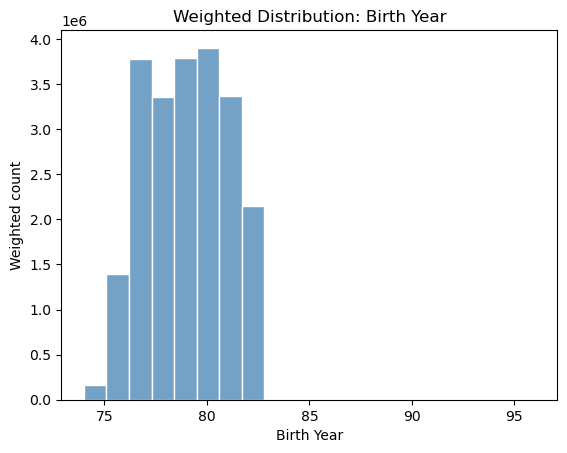

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df1, x=var, weights=weight, bins=20,
             color='steelblue', edgecolor='white')
plt.title('Weighted Distribution: Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Weighted count')
plt.show()


In [149]:
# Convert both variables and the weight to numeric, forcing blanks to NaN
df1['Age when Moved to Current Residence'] = pd.to_numeric(
    df1['Age when Moved to Current Residence'], errors='coerce'
)
df1['GSWGT134'] = pd.to_numeric(
    df1['GSWGT134'], errors='coerce'
)


In [151]:
#trouble paying attention attention at school
var = 'Trouble Paying Attention'
weight = 'GSWGT134'

df = df1[[var, weight]].dropna()
df[var] = pd.to_numeric(df[var], errors='coerce')

weighted_freq = (
    df.groupby(var, as_index=False)[weight]
      .sum()
      .rename(columns={weight: 'Weighted_N'})
)
weighted_freq['Weighted_%'] = (
    weighted_freq['Weighted_N'] / weighted_freq['Weighted_N'].sum() * 100
)

print(weighted_freq.sort_values('Weighted_%', ascending=False))


   Trouble Paying Attention    Weighted_N  Weighted_%
1                         1  9.777789e+06   44.635607
0                         0  4.949171e+06   22.592964
2                         2  3.784490e+06   17.276198
3                         3  2.194645e+06   10.018555
4                         4  7.370798e+05    3.364769
6                         7  4.369105e+05    1.994496
5                         6  1.592096e+04    0.072679
7                         8  9.798789e+03    0.044731


 0 never
 1 just a few times
 2 about once a week
 3 almost everyday
 4 everyday


## Relations with Drinking Behavior

In [153]:
# Extract numeric min/max for each tuple variable
df1['Days_min']   = df1['DaysTuplePeak'].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
df1['Days_max']   = df1['DaysTuplePeak'].apply(lambda x: x[1] if isinstance(x, tuple) else np.nan)
df1['Drinks_min'] = df1['DrinksTuplePeak'].apply(lambda x: x[0] if isinstance(x, tuple) else np.nan)
df1['Drinks_max'] = df1['DrinksTuplePeak'].apply(lambda x: x[1] if isinstance(x, tuple) else np.nan)

# Compute total drinks (min and max)
df1['PeakTotalDrinksIndex_lower'] = df1['Days_min'] * df1['Drinks_min']
df1['PeakTotalDrinksIndex_upper'] = df1['Days_max'] * df1['Drinks_max']


In [155]:
df1.drop(columns=['Days_min', 'Days_max', 'Drinks_min', 'Drinks_max'], inplace=True)


In [159]:
import numpy as np

# Drop rows with missing values in either variable or weight
temp = df1.dropna(subset=['PeakTotalDrinksIndex_upper', 'GSWGT134'])

weighted_mean = np.average(temp['PeakTotalDrinksIndex_upper'], weights=temp['GSWGT134'])
unweighted_mean = df1['PeakTotalDrinksIndex_upper'].mean()

print(f"Weighted mean: {weighted_mean:.3f}")
print(f"Unweighted mean: {unweighted_mean:.3f}")


Weighted mean: 108.344
Unweighted mean: 107.869


In [161]:
import numpy as np
import pandas as pd

var = 'PeakTotalDrinksIndex_upper'   # <-- use the upper bound version
group = 'BIO_SEX'                  # male/female
weight = 'GSWGT134'

# Filter and clean
df = df1[[var, group, weight]].dropna(subset=[var, group, weight])
df[weight] = pd.to_numeric(df[weight], errors='coerce')
df[var] = pd.to_numeric(df[var], errors='coerce')
df = df.dropna(subset=[weight])

# Compute weighted means by sex
weighted_means = (
    df.groupby(group)
      .apply(lambda g: np.average(g[var], weights=g[weight]))
      .reset_index(name='Weighted Mean Total Drinks (Upper Bound)')
)

print(weighted_means)


   BIO_SEX  Weighted Mean Total Drinks (Upper Bound)
0        1                                146.193364
1        2                                 79.994638


C:\Users\pc\AppData\Local\Temp\ipykernel_9620\2921376436.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g[var], weights=g[weight]))


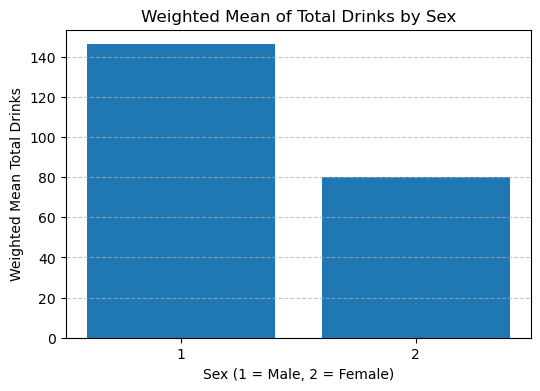

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(weighted_means[group].astype(str), weighted_means['Weighted Mean Total Drinks (Upper Bound)'])
plt.title('Weighted Mean of Total Drinks by Sex')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Weighted Mean Total Drinks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [165]:
print(df1['BirthYear'].describe())


count    5114.000000
mean       79.016034
std         1.807296
min        74.000000
25%        78.000000
50%        79.000000
75%        80.000000
max        96.000000
Name: BirthYear, dtype: float64


In [167]:

df1['BirthYearGroup'] = pd.cut(
    df1['BirthYear'],
    bins=[73, 76, 79,83],
    labels=['1974–76', '1977–79', '1980–83']
)


In [169]:
df1['BirthYearGroup'].head(10)

0    1974–76
1    1977–79
2    1980–83
3    1980–83
4    1977–79
5    1977–79
6    1980–83
7    1977–79
8    1980–83
9    1974–76
Name: BirthYearGroup, dtype: category
Categories (3, object): ['1974–76' < '1977–79' < '1980–83']

In [171]:
# relation between age at first drink and total drinks at peak
import numpy as np
import pandas as pd

# Extract numeric values from tuples
df1['AgeFirstDrink_lower'] = df1['AgeFirstDrinkTuple'].apply(
    lambda t: t[0] if isinstance(t, tuple) else np.nan
)
df1['PeakTotalDrinksIndex_upper'] = pd.to_numeric(df1['PeakTotalDrinksIndex_upper'], errors='coerce')
df1['Weight'] = pd.to_numeric(df1['GSWGT134'], errors='coerce')

# Drop missing
temp = df1.dropna(subset=['AgeFirstDrink_lower', 'PeakTotalDrinksIndex_upper', 'BIO_SEX', 'Weight'])


In [173]:
# Weighted correlation function
def weighted_corr(x, y, w):
    x_mean = np.average(x, weights=w)
    y_mean = np.average(y, weights=w)
    cov_xy = np.average((x - x_mean) * (y - y_mean), weights=w)
    var_x = np.average((x - x_mean)**2, weights=w)
    var_y = np.average((y - y_mean)**2, weights=w)
    return cov_xy / np.sqrt(var_x * var_y)

corr = weighted_corr(temp['AgeFirstDrink_lower'], temp['PeakTotalDrinksIndex_upper'], temp['Weight'])
print(f"Weighted correlation between Age at First Drink (min) and Peak Total Drinks (max): {corr:.3f}")


Weighted correlation between Age at First Drink (min) and Peak Total Drinks (max): -0.230


In [175]:
import numpy as np
import pandas as pd

# Drop missing cases
temp = df1.dropna(subset=['AgeFirstDrink_lower', 'PeakTotalDrinksIndex_upper']).copy()

# Extract variables
x = temp['AgeFirstDrink_lower']
y = temp['PeakTotalDrinksIndex_upper']

# Unweighted correlation (standard Pearson)
corr_unweighted = x.corr(y)  # default is Pearson correlation
print(f"Unweighted correlation between Age at First Drink (min) and Peak Total Drinks (max): {corr_unweighted:.3f}")


Unweighted correlation between Age at First Drink (min) and Peak Total Drinks (max): -0.140


Given this binning, a correlation of −0.23 is actually quite strong. It means that even with most respondents grouped in one flat range, you’re still detecting a consistent negative pattern.
If the raw ages were continuous, the slope would almost certainly be more negative ( −0.35 to −0.4).

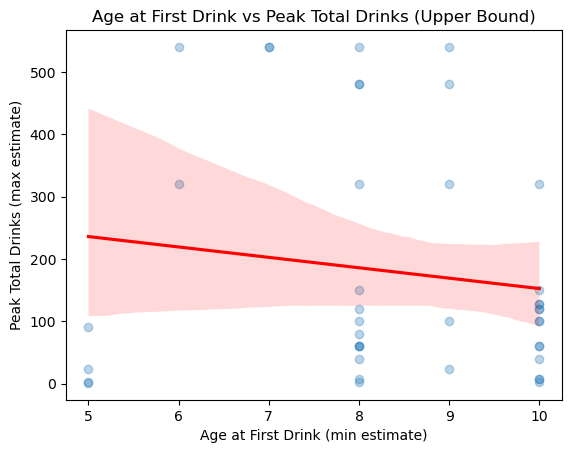

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    data=filtered_df,
    x='AgeFirstDrink_lower',
    y='PeakTotalDrinksIndex_upper',
    scatter_kws={'alpha':0.3},
    line_kws={'color':'red'}
)
plt.title('Age at First Drink vs Peak Total Drinks (Upper Bound)')
plt.xlabel('Age at First Drink (min estimate)')
plt.ylabel('Peak Total Drinks (max estimate)')
plt.show()


## Correlation with Religion

In [183]:
# Convert to numeric first
df1['LowReligiousImportance'] = pd.to_numeric(df1['LowReligiousImportance'], errors='coerce')
df1['LowReligiousImportance'] = df1['LowReligiousImportance'].replace(7, np.nan)
df1['ReligionGroup'] = pd.to_numeric(df1['ReligionGroup'], errors='coerce')

# --- Religion importance: higher = more important ---
# Codes 1–4 are valid responses; 6, 7, 8 = missing/skip/refused
df1['ReligionGroup'] = df1['ReligionGroup'].replace({
    6: np.nan, 7: np.nan, 8: np.nan
})

# --- Religion type: collapse major groups for meaningful comparison ---
df1['ReligionGroup'] = df1['ReligionGroup'].map({
    0: 'None',
    4: 'Baptist',
    22: 'Catholic',
    25: 'Muslim',
    23: 'Eastern Orthodox',
    24: 'Hindu',
    21: 'Buddhist',
    26: 'Jewish',
    28: 'Other',
    # all other Protestant denominations lumped together
    1: 'Protestant', 2: 'Protestant', 3: 'Protestant', 5: 'Protestant', 6: 'Protestant',
    7: 'Protestant', 8: 'Protestant', 9: 'Protestant', 10: 'Protestant', 11: 'Protestant',
    12: 'Protestant', 13: 'Protestant', 14: 'Protestant', 15: 'Protestant', 16: 'Protestant',
    17: 'Protestant', 18: 'Protestant', 19: 'Protestant', 20: 'Protestant', 27: 'Protestant'
})


In [229]:
'Weight' in df1

False

In [233]:
df1.rename(columns={'GSWGT134': 'Weight'}, inplace=True)


In [259]:
import numpy as np
import pandas as pd

# 1️⃣ Drop existing ReligionGroup column (if any)
df1.drop(columns=['ReligionGroup'], inplace=True, errors='ignore')
df['AID'] = df['AID'].astype(str)
df1['AID'] = df1['AID'].astype(str)

# 2️⃣ Merge H1RE1 from df using AID, rename to ReligionGroup
df1 = df1.merge(df[['AID', 'H1RE1']], on='AID', how='left')
df1.rename(columns={'H1RE1': 'ReligionGroup'}, inplace=True)

# 3️⃣ Convert to numeric and set 96, 98, 99 as NaN
df1['ReligionGroup'] = pd.to_numeric(df1['ReligionGroup'], errors='coerce')
df1.loc[df1['ReligionGroup'].isin([96, 98, 99]), 'ReligionGroup'] = np.nan

# 4️⃣ Optional: check the result
print(df1['ReligionGroup'].value_counts(dropna=False))
print(df1['ReligionGroup'].describe())


ReligionGroup
4.0     1270
22.0    1096
0.0      581
5.0      439
14.0     318
13.0     199
19.0     180
16.0     156
28.0     144
17.0     108
NaN       88
8.0       82
12.0      70
11.0      61
10.0      57
2.0       52
3.0       48
26.0      39
1.0       22
7.0       20
21.0      19
23.0      15
25.0      15
18.0      14
27.0       6
6.0        5
24.0       4
9.0        3
15.0       2
20.0       1
Name: count, dtype: int64
count    5026.000000
mean       11.163351
std         8.638579
min         0.000000
25%         4.000000
50%         8.000000
75%        22.000000
max        28.000000
Name: ReligionGroup, dtype: float64


In [261]:
import numpy as np
import pandas as pd

var = 'PeakTotalDrinksIndex_upper'

cols_to_convert = [var, 'Weight', 'ReligionGroup', 'LowReligiousImportance']

for c in cols_to_convert:
    df1[c] = pd.to_numeric(df1[c], errors='coerce')


temp = df1.dropna(subset=[var, 'Weight', 'ReligionGroup', 'LowReligiousImportance'])

# Weighted mean by religion importance
importance_means = (
    temp.groupby('LowReligiousImportance', group_keys=False)
        .apply(lambda g: pd.Series({'Weighted Mean Peak Drinks': np.average(g[var], weights=g['Weight'])}),
               include_groups=False)
        .reset_index()
)

# Weighted mean by religion group
group_means = (
    temp.groupby('ReligionGroup', group_keys=False)
        .apply(lambda g: pd.Series({'Weighted Mean Peak Drinks': np.average(g[var], weights=g['Weight'])}),
               include_groups=False)
        .reset_index()
)

print(importance_means)
print(group_means)



   LowReligiousImportance  Weighted Mean Peak Drinks
0                     1.0                  89.690943
1                     2.0                 119.639315
2                     3.0                 116.817042
3                     4.0                 163.173159
    ReligionGroup  Weighted Mean Peak Drinks
0             1.0                 116.275524
1             2.0                  70.833457
2             3.0                 112.401764
3             4.0                 100.264293
4             5.0                 124.030474
5             6.0                 150.000000
6             7.0                 135.465206
7             8.0                 138.975156
8            10.0                 100.853457
9            11.0                 124.652024
10           12.0                 115.012748
11           13.0                 106.478780
12           14.0                  80.507885
13           15.0                 128.000000
14           16.0                  59.178840
15           17

C:\Users\pc\AppData\Local\Temp\ipykernel_9620\2347939584.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: weighted_mean(g['PeakTotalDrinksIndex_upper'], g['Weight']))


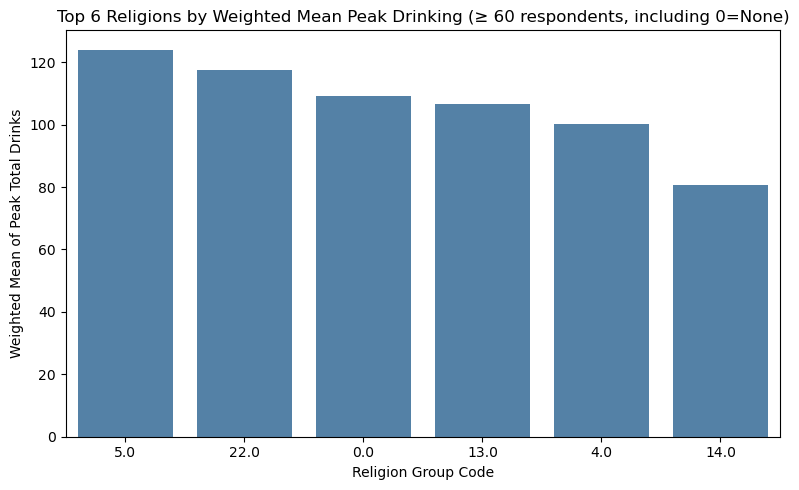

In [281]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Weighted mean helper
def weighted_mean(x, w):
    return (x * w).sum() / w.sum()

# Drop missing in key variables
subset = df1.dropna(subset=['ReligionGroup', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Filter to religions with ≥ 60 respondents
counts = subset['ReligionGroup'].value_counts()
valid_religions = counts[counts > 60].index
subset = subset[subset['ReligionGroup'].isin(valid_religions)]

# Compute weighted mean by religion group
weighted_means = (
    subset.groupby('ReligionGroup')
    .apply(lambda g: weighted_mean(g['PeakTotalDrinksIndex_upper'], g['Weight']))
    .reset_index(name='WeightedMean')
)

# Sort by mean descending and keep top 6
top6 = weighted_means.sort_values('WeightedMean', ascending=False).head(6)

# --- Plot ---
plt.figure(figsize=(8,5))
sns.barplot(
    data=top6,
    x='ReligionGroup',
    y='WeightedMean',
    order=top6.sort_values('WeightedMean', ascending=False)['ReligionGroup'],  # ensures descending order
    color='steelblue'
)
plt.title('Top 6 Religions by Weighted Mean Peak Drinking (≥ 60 respondents, including 0=None)')
plt.xlabel('Religion Group Code')
plt.ylabel('Weighted Mean of Peak Total Drinks')
plt.tight_layout()
plt.show()


Disciples of Christ, Catholic, None, Lutheran, Baptist, Methodist.None religion comes in third place

In [207]:
df1['PeakTotalDrinksIndex_upper'].nunique

<bound method IndexOpsMixin.nunique of 0         NaN
1         NaN
2       480.0
3         NaN
4         NaN
        ...  
5109      NaN
5110    320.0
5111      NaN
5112      NaN
5113    480.0
Name: PeakTotalDrinksIndex_upper, Length: 5114, dtype: float64>

In [265]:
# Drop missing cases for relevant vars
temp = df1.dropna(
    subset=['ReligionGroup', 'PeakTotalDrinksIndex_upper', 'Weight']
).copy()

# Count raw cases per group
counts = (
    temp['ReligionGroup']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'ReligionGroup', 'ReligionGroup': 'Count'})
    .sort_values('Count', ascending=False)
)

# Add also the weighted sum of weights per group (optional)
weighted_counts = (
    temp.groupby('ReligionGroup')['Weight']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Valid_N', 'sum': 'Weight_Sum'})
    .sort_values('Valid_N', ascending=False)
    .reset_index()
)

print(weighted_counts)


    ReligionGroup  Valid_N    Weight_Sum
0            22.0      330  1.802089e+06
1             4.0      275  1.186319e+06
2             0.0      148  7.804404e+05
3             5.0      116  5.695560e+05
4            14.0      106  5.499885e+05
5            13.0       63  4.152263e+05
6            19.0       46  2.516088e+05
7            16.0       35  1.967914e+05
8            28.0       35  1.691939e+05
9            17.0       34  1.757753e+05
10            8.0       28  1.151142e+05
11           26.0       24  1.110825e+05
12           12.0       16  8.282075e+04
13           11.0       15  6.871763e+04
14            3.0       11  6.018600e+04
15           10.0        9  4.273004e+04
16            7.0        8  4.006491e+04
17            2.0        8  2.341934e+04
18            1.0        5  1.141812e+04
19           21.0        4  2.383657e+04
20           25.0        4  1.454929e+04
21           27.0        3  9.483608e+03
22           23.0        2  1.379645e+04
23            6.

some religions are under represented in the survey which caused the unrepresentative results. We will only use Religion importance throught the rest of the analysis (Catholic,Baptist,None,Disciples of Christ, Methodist)

C:\Users\pc\AppData\Local\Temp\ipykernel_9620\875965547.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: weighted_mean(g['PeakTotalDrinksIndex_upper'], g['Weight']))


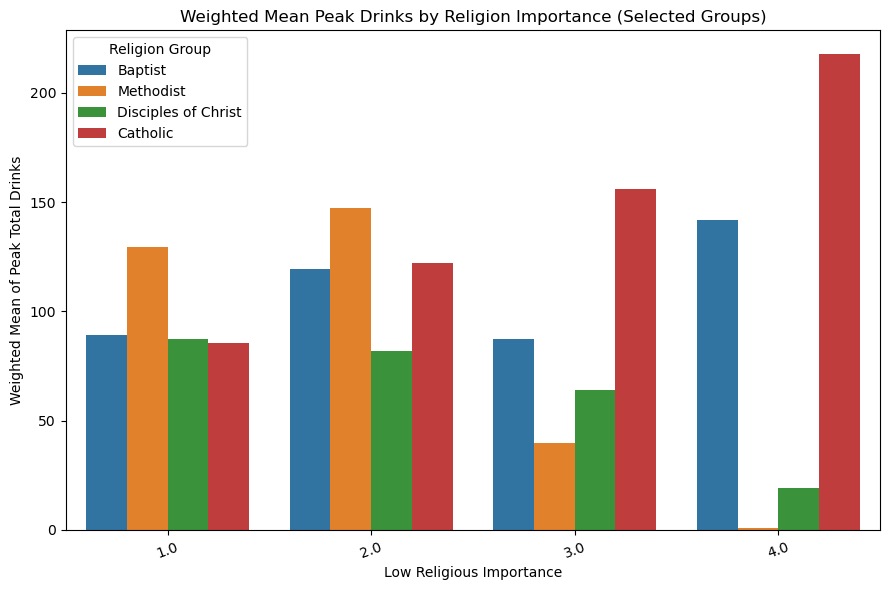

In [268]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Helper function ---
def weighted_mean(x, w):
    return (x * w).sum() / w.sum()

# --- Mapping of codes to readable names ---
religion_map = {
    22: 'Catholic',
    4:  'Baptist',
    0:  'None',
    14: 'Disciples of Christ',
    11: 'Methodist'   # adjust this code if your dataset uses a different value
}

# --- Filter to the selected denominations ---
selected_codes = list(religion_map.keys())
subset = df1[df1['ReligionGroup'].isin(selected_codes)].copy()

# --- Clean key columns ---
subset = subset.dropna(subset=['LowReligiousImportance',
                               'PeakTotalDrinksIndex_upper',
                               'Weight'])

# --- Compute weighted means ---
weighted_means = (
    subset
    .groupby(['ReligionGroup', 'LowReligiousImportance'])
    .apply(lambda g: weighted_mean(g['PeakTotalDrinksIndex_upper'], g['Weight']))
    .reset_index(name='WeightedMean')
)

# --- Replace numeric codes with names for plotting ---
weighted_means['ReligionGroup'] = weighted_means['ReligionGroup'].map(religion_map)

# --- Plot ---
plt.figure(figsize=(9,6))
sns.barplot(
    data=weighted_means,
    x='LowReligiousImportance',
    y='WeightedMean',
    hue='ReligionGroup'
)
plt.title('Weighted Mean Peak Drinks by Religion Importance (Selected Groups)')
plt.ylabel('Weighted Mean of Peak Total Drinks')
plt.xlabel('Low Religious Importance')
plt.xticks(rotation=20)
plt.legend(title='Religion Group')
plt.tight_layout()
plt.show()


In [270]:
# Weighted OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

subset = subset.dropna(subset=['PeakTotalDrinksIndex_upper', 'LowReligiousImportance', 'ReligionGroup', 'Weight'])

model = smf.wls(
    'PeakTotalDrinksIndex_upper ~ C(ReligionGroup) * LowReligiousImportance',
    data=subset,
    weights=subset['Weight']
).fit()

print(model.summary())


                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.035
Model:                                    WLS   Adj. R-squared:                  0.026
Method:                         Least Squares   F-statistic:                     3.758
Date:                        Wed, 29 Oct 2025   Prob (F-statistic):           0.000520
Time:                                15:54:42   Log-Likelihood:                -4664.8
No. Observations:                         726   AIC:                             9346.
Df Residuals:                             718   BIC:                             9382.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------

This weighted least squares regression serves as an exploratory step focusing on a single variable—religion—to examine its isolated association with peak drinking levels before inclusion in the broader classification framework. The results show that neither religious denomination (Methodist, Disciples of Christ, or Catholic) nor the level of religious importance significantly predicts peak drinking. Although individuals reporting lower religious importance tend to drink slightly more on average, the effect is not statistically significant. With an R² of only 0.035, this variable on its own explains little of the variance in drinking behavior. These findings suggest that religion, while conceptually relevant, contributes minimally in isolation and should be evaluated in the context of the full multivariate classification model that integrates plenty behavioral, social, and psychological predictors.

## Correlation with School and Engagement

In [286]:
df1['TimesSkippedSchool'].head()

0    15
1     3
2     4
3     0
4     0
Name: TimesSkippedSchool, dtype: object

In [288]:
import numpy as np
import pandas as pd

# Clean H1ED2 (Times skipped school without excuse)
df1['TimesSkippedSchool'] = pd.to_numeric(df1['TimesSkippedSchool'], errors='coerce')

# Set invalid or special codes to NaN
df1.loc[df1['TimesSkippedSchool'].isin([996, 997, 998, 999]), 'TimesSkippedSchool'] = np.nan


In [290]:
df1['TimesSkippedSchool'].describe()

count    5013.000000
mean        1.852184
std         6.971288
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        99.000000
Name: TimesSkippedSchool, dtype: float64

In [292]:
import numpy as np
import pandas as pd

# 1️⃣ Create a cleaned temporary dataset
temp = df1.dropna(subset=['TimesSkippedSchool', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# 2️⃣ Extract the variables
x = temp['TimesSkippedSchool']
y = temp['PeakTotalDrinksIndex_upper']
w = temp['Weight']

# 3️⃣ Weighted means
mean_x = np.average(x, weights=w)
mean_y = np.average(y, weights=w)

# 4️⃣ Weighted covariance and variances
cov_xy = np.average((x - mean_x) * (y - mean_y), weights=w)
var_x = np.average((x - mean_x)**2, weights=w)
var_y = np.average((y - mean_y)**2, weights=w)

# 5️⃣ Weighted correlation
corr = cov_xy / np.sqrt(var_x * var_y)
print(f"Weighted correlation (TimesSkippedSchool vs Peak Drinks): {corr:.3f}")



Weighted correlation (TimesSkippedSchool vs Peak Drinks): 0.086


C:\Users\pc\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


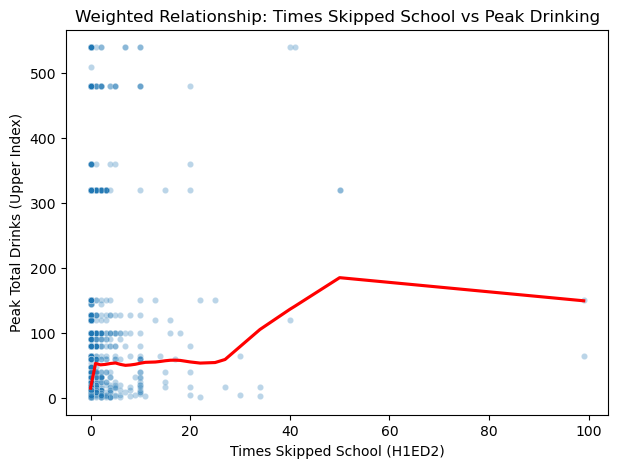

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,5))

# Scatter plot (alpha for visibility)
sns.scatterplot(
    data=temp,
    x='TimesSkippedSchool',
    y='PeakTotalDrinksIndex_upper',
    alpha=0.3,
    s=20
)

# Weighted smoothing line (use lowess)
sns.regplot(
    data=temp,
    x='TimesSkippedSchool',
    y='PeakTotalDrinksIndex_upper',
    scatter=False,
    line_kws={'color':'red'},
    lowess=True
)

plt.title('Weighted Relationship: Times Skipped School vs Peak Drinking')
plt.xlabel('Times Skipped School (H1ED2)')
plt.ylabel('Peak Total Drinks (Upper Index)')
plt.show()


In [298]:
import numpy as np

# Make sure the column exists
df1['SchoolCloseness'] = pd.to_numeric(df1['SchoolCloseness'], errors='coerce')

# Replace invalid codes with NaN
df1.loc[df1['SchoolCloseness'].isin([6,7,8]), 'SchoolCloseness'] = np.nan

# Reverse the scale so higher = stronger connection (1→5 becomes 5→1)
df1['SchoolCloseness'] = 6 - df1['SchoolCloseness']

# Quick check
df1['SchoolCloseness'].value_counts(dropna=False).sort_index()


SchoolCloseness
1.0     183
2.0     502
3.0     956
4.0    2355
5.0    1022
NaN      96
Name: count, dtype: int64

In [300]:
from statsmodels.formula.api import wls
import numpy as np
import pandas as pd

# Drop missing
temp = df1.dropna(subset=['SchoolCloseness', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Weighted means by closeness level
weighted_means = (
    temp.groupby('SchoolCloseness')
        .apply(lambda g: np.average(g['PeakTotalDrinksIndex_upper'], weights=g['Weight']))
        .reset_index(name='WeightedMean')
)

print(weighted_means)


   SchoolCloseness  WeightedMean
0              1.0    163.164673
1              2.0    124.021808
2              3.0    119.425231
3              4.0    100.064884
4              5.0     99.708513


C:\Users\pc\AppData\Local\Temp\ipykernel_9620\1814579406.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['PeakTotalDrinksIndex_upper'], weights=g['Weight']))


In [302]:
model = wls(
    'PeakTotalDrinksIndex_upper ~ SchoolCloseness',
    data=temp,
    weights=temp['Weight']
).fit()

print(model.summary())


                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.009
Model:                                    WLS   Adj. R-squared:                  0.008
Method:                         Least Squares   F-statistic:                     11.66
Date:                        Wed, 29 Oct 2025   Prob (F-statistic):           0.000657
Time:                                16:23:17   Log-Likelihood:                -8490.6
No. Observations:                        1323   AIC:                         1.699e+04
Df Residuals:                            1321   BIC:                         1.700e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

The results indicate a statistically significant negative relationship (β = –12.60, p = 0.001), suggesting that stronger feelings of closeness to one’s school are associated with lower peak drinking. The model explains about 0.9% of the variance in drinking behavior (R² = 0.009), meaning that while school connectedness has a modest but significant protective effect, it alone accounts for little variation. This supports its inclusion in the final multivariate classification model

In [305]:
#GPA
import numpy as np

grade_vars = ['H1ED11', 'H1ED12', 'H1ED13', 'H1ED14']

# Convert to numeric and clean
for v in grade_vars:
    df1[v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([5,6,96,97,98,99]), v] = np.nan

# Reverse so higher = better grade
for v in grade_vars:
    df1[v] = 5 - df1[v]

# Compute GPA index
df1['GPA_Index'] = df1[[v for v in grade_vars]].mean(axis=1)

df1['GPA_Index'].describe()


count    4972.000000
mean        2.821852
std         0.763167
min         1.000000
25%         2.250000
50%         2.750000
75%         3.500000
max         4.000000
Name: GPA_Index, dtype: float64

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


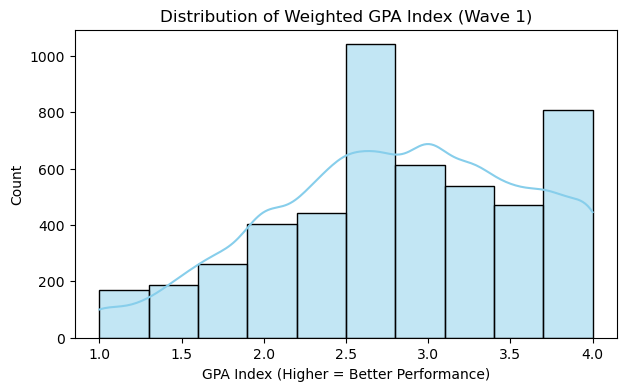

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.histplot(filtered_df['GPA_Index'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Weighted GPA Index (Wave 1)')
plt.xlabel('GPA Index (Higher = Better Performance)')
plt.ylabel('Count')
plt.show()


In [309]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # use OLS instead of WLS for unweighted regression

# 1️⃣ Drop missing
temp = df1.dropna(subset=['GPA_Index', 'PeakTotalDrinksIndex_upper']).copy()

# 2️⃣ Extract variables
x = temp['GPA_Index']
y = temp['PeakTotalDrinksIndex_upper']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (GPA vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ GPA_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (GPA vs Peak Drinks): -0.104
                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.011
Model:                                    OLS   Adj. R-squared:                  0.010
Method:                         Least Squares   F-statistic:                     17.14
Date:                        Wed, 29 Oct 2025   Prob (F-statistic):           3.65e-05
Time:                                16:28:25   Log-Likelihood:                -9910.6
No. Observations:                        1565   AIC:                         1.983e+04
Df Residuals:                            1563   BIC:                         1.984e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

This simple OLS regression examines the relationship between academic performance (GPA) and peak drinking levels, showing a statistically significant negative association. The coefficient for GPA (β = –19.15, p < 0.001) indicates that higher academic achievement is linked to substantially lower peak drinking scores. Although the effect is significant, the model explains only about 1.1% of the variance (R² = 0.011), suggesting that GPA alone accounts for a small portion of drinking behavior differences. These results align with prior evidence that academic engagement serves as a modest protective factor against heavy alcohol use, warranting its inclusion as one of several behavioral predictors in the final multivariate classification model.

In [314]:
#trouble index
import numpy as np

trouble_vars = ['H1ED15', 'Trouble Paying Attention', 'H1ED17', 'H1ED18']

# Convert and clean
for v in trouble_vars:
    df1.loc[:, v] = pd.to_numeric(df1[v], errors='coerce')
    df1.loc[df1[v].isin([6,7,8]), v] = np.nan

# Compute mean index (higher = more trouble)
df1['SchoolTrouble_Index'] = df1[trouble_vars].mean(axis=1)

df1['SchoolTrouble_Index'].describe()


count    5019.000000
mean        1.044547
std         0.721706
min         0.000000
25%         0.500000
50%         1.000000
75%         1.500000
max         4.000000
Name: SchoolTrouble_Index, dtype: float64

continue here

In [26]:
from statsmodels.formula.api import wls

temp = filtered_df.dropna(subset=['SchoolTrouble_Index', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['SchoolTrouble_Index'], temp['PeakTotalDrinksIndex_upper'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (School Trouble vs Peak Drinks): {corr:.3f}")

# Weighted regression
model = wls('PeakTotalDrinksIndex_upper ~ SchoolTrouble_Index', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (School Trouble vs Peak Drinks): 0.048
                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.002
Model:                                    WLS   Adj. R-squared:                  0.002
Method:                         Least Squares   F-statistic:                     2.996
Date:                        Wed, 22 Oct 2025   Prob (F-statistic):             0.0837
Time:                                15:17:38   Log-Likelihood:                -8455.6
No. Observations:                        1316   AIC:                         1.692e+04
Df Residuals:                            1314   BIC:                         1.693e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [

In [44]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # use OLS for unweighted regression

# 1️⃣ Drop missing
temp = filtered_df.dropna(subset=['SchoolTrouble_Index', 'PeakTotalDrinksIndex_upper']).copy()

# 2️⃣ Extract variables
x = temp['SchoolTrouble_Index']
y = temp['PeakTotalDrinksIndex_upper']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (School Trouble vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ SchoolTrouble_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (School Trouble vs Peak Drinks): 0.031
                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.001
Model:                                    OLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                     1.521
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):              0.218
Time:                                13:11:54   Log-Likelihood:                -9940.0
No. Observations:                        1567   AIC:                         1.988e+04
Df Residuals:                            1565   BIC:                         1.989e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|     

C:\Users\pc\AppData\Local\Temp\ipykernel_19256\4289813664.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby(pd.cut(temp['SchoolTrouble_Index'],
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


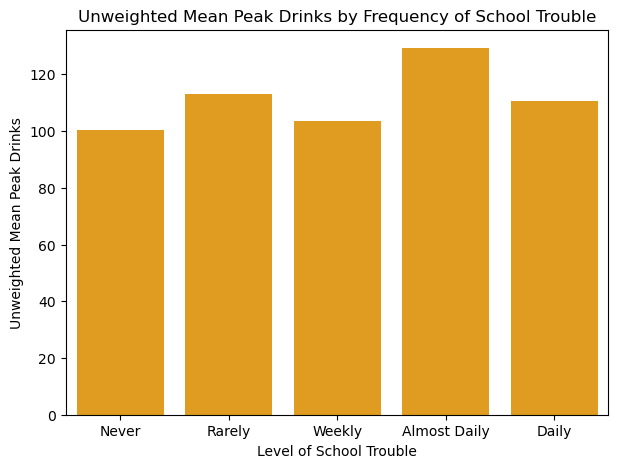

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Unweighted means by trouble category
unweighted_means = (
    temp.groupby(pd.cut(temp['SchoolTrouble_Index'], 
                        bins=[-0.1,0.5,1.5,2.5,3.5,4.5],
                        labels=['Never','Rarely','Weekly','Almost Daily','Daily']))
        ['PeakTotalDrinksIndex_upper']
        .mean()
        .reset_index(name='UnweightedMean')
)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(data=unweighted_means, x='SchoolTrouble_Index', y='UnweightedMean', color='orange')
plt.title('Unweighted Mean Peak Drinks by Frequency of School Trouble')
plt.xlabel('Level of School Trouble')
plt.ylabel('Unweighted Mean Peak Drinks')
plt.show()


In [21]:
# count number of 'daily trouble' (value == 1) across all 4 variables
filtered_df['trouble_count'] = (filtered_df[trouble_vars] == 1).sum(axis=1)

# display frequency table
count_table = filtered_df['trouble_count'].value_counts().sort_index()

print("Counts of students reporting daily trouble in 1–4 areas:")
print(count_table)


Counts of students reporting daily trouble in 1–4 areas:
trouble_count
0     924
1    1265
2    1569
3    1003
4     353
Name: count, dtype: int64


Students who report more frequent difficulties at school—such as trouble getting along with teachers or peers, paying attention, or completing homework—tend to exhibit higher levels of peak alcohol consumption.
Although the relationship is not statistically significant at p < 0.05, its direction and magnitude align with the hypothesis that behavioral disengagement within school contexts predicts greater involvement in risk behaviors such as heavy drinking.


In [34]:
# Convert to numeric and clean invalid codes
filtered_df['SchoolSuspension'] = pd.to_numeric(df['SchoolSuspension'], errors='coerce')
filtered_df.loc[filtered_df['SchoolSuspension'].isin([6, 8, 9]), 'SchoolSuspension'] = np.nan


In [38]:
filtered_df['SchoolSuspension'].head()

0    0.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: SchoolSuspension, dtype: float64

In [44]:
filtered_df['SchoolSuspension'].value_counts(dropna=False)


SchoolSuspension
0.0    3680
1.0    1425
NaN       9
Name: count, dtype: int64

In [40]:
filtered_df['SchoolSuspension'].describe()

count    5105.000000
mean        0.279138
std         0.448619
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SchoolSuspension, dtype: float64

In [46]:
from statsmodels.formula.api import wls

temp = filtered_df.dropna(subset=['SchoolSuspension', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['SchoolSuspension'], temp['PeakTotalDrinksIndex_upper'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Suspension vs Peak Drinks): {corr:.3f}")

# Weighted regression
model = wls('PeakTotalDrinksIndex_upper ~ SchoolSuspension', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Suspension vs Peak Drinks): 0.086
                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.007
Model:                                    WLS   Adj. R-squared:                  0.007
Method:                         Least Squares   F-statistic:                     9.860
Date:                        Wed, 22 Oct 2025   Prob (F-statistic):            0.00173
Time:                                15:37:46   Log-Likelihood:                -8603.8
No. Observations:                        1340   AIC:                         1.721e+04
Df Residuals:                            1338   BIC:                         1.722e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025  

In [49]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # OLS for unweighted regression

# 1️⃣ Drop missing cases
temp = filtered_df.dropna(subset=['SchoolSuspension', 'PeakTotalDrinksIndex_upper']).copy()

# 2️⃣ Extract variables
x = temp['SchoolSuspension']
y = temp['PeakTotalDrinksIndex_upper']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Suspension vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ SchoolSuspension', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Suspension vs Peak Drinks): 0.074
                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.005
Model:                                    OLS   Adj. R-squared:                  0.005
Method:                         Least Squares   F-statistic:                     8.803
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):            0.00305
Time:                                13:20:39   Log-Likelihood:                -10130.
No. Observations:                        1598   AIC:                         2.026e+04
Df Residuals:                            1596   BIC:                         2.027e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                       coef    std err          t      P>|t|      [0.025

C:\Users\pc\AppData\Local\Temp\ipykernel_5732\1485448331.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['PeakTotalDrinksIndex_upper'], weights=g['Weight']))


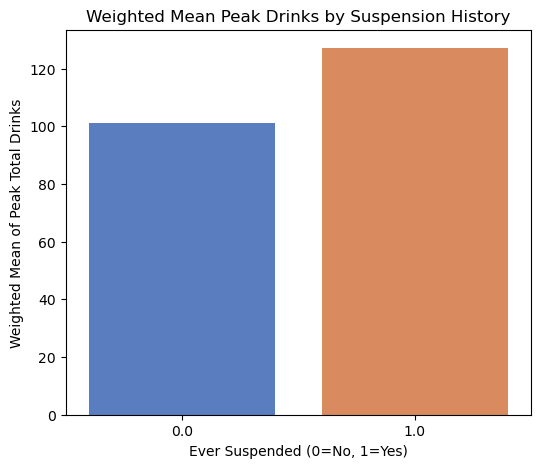

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

weighted_means = (
    temp.groupby('SchoolSuspension')
        .apply(lambda g: np.average(g['PeakTotalDrinksIndex_upper'], weights=g['Weight']))
        .reset_index(name='WeightedMean')
)

plt.figure(figsize=(6,5))
sns.barplot(data=weighted_means, x='SchoolSuspension', y='WeightedMean', palette='muted')
plt.title('Weighted Mean Peak Drinks by Suspension History')
plt.xlabel('Ever Suspended (0=No, 1=Yes)')
plt.ylabel('Weighted Mean of Peak Total Drinks')
plt.show()


Students who have ever been suspended from school report markedly higher levels of peak alcohol consumption. The effect is statistically significant (β = +26.05, p = 0.002), suggesting that school disciplinary actions are linked to heavier drinking patterns.
While suspension likely reflects behavioral issues rather than causing drinking directly, it serves as a clear marker of higher risk for substance use.

In [51]:
#expulsion
# Convert to numeric and clean
filtered_df['SchoolExpulsion'] = pd.to_numeric(filtered_df['SchoolExpulsion'], errors='coerce')
filtered_df.loc[filtered_df['SchoolExpulsion'].isin([6, 8, 9]), 'SchoolExpulsion'] = np.nan

# Quick frequency check
filtered_df['H1ED9'].value_counts(dropna=False)


H1ED9
0.0    4890
1.0     214
NaN      10
Name: count, dtype: int64

In [61]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # OLS for unweighted regression

# 1️⃣ Drop missing cases
temp = filtered_df.dropna(subset=['SchoolExpulsion', 'PeakTotalDrinksIndex_upper']).copy()

# 2️⃣ Extract variables
x = temp['SchoolExpulsion']
y = temp['PeakTotalDrinksIndex_upper']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Expulsion vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ SchoolExpulsion', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Expulsion vs Peak Drinks): 0.043
                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.002
Model:                                    OLS   Adj. R-squared:                  0.001
Method:                         Least Squares   F-statistic:                     2.946
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):             0.0863
Time:                                14:27:28   Log-Likelihood:                -10128.
No. Observations:                        1598   AIC:                         2.026e+04
Df Residuals:                            1596   BIC:                         2.027e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025  

In [55]:
from statsmodels.formula.api import wls
import numpy as np

temp = filtered_df.dropna(subset=['SchoolExpulsion', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['SchoolExpulsion'], temp['PeakTotalDrinksIndex_upper'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Expulsion vs Peak Drinks): {corr:.3f}")

# Weighted regression
model = wls('PeakTotalDrinksIndex_upper ~ SchoolExpulsion', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Expulsion vs Peak Drinks): 0.051
                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.003
Model:                                    WLS   Adj. R-squared:                  0.002
Method:                         Least Squares   F-statistic:                     3.560
Date:                        Wed, 22 Oct 2025   Prob (F-statistic):             0.0594
Time:                                15:46:52   Log-Likelihood:                -8615.1
No. Observations:                        1342   AIC:                         1.723e+04
Df Residuals:                            1340   BIC:                         1.724e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025    

C:\Users\pc\AppData\Local\Temp\ipykernel_5732\3562037418.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.average(g['PeakTotalDrinksIndex_upper'], weights=g['Weight']))


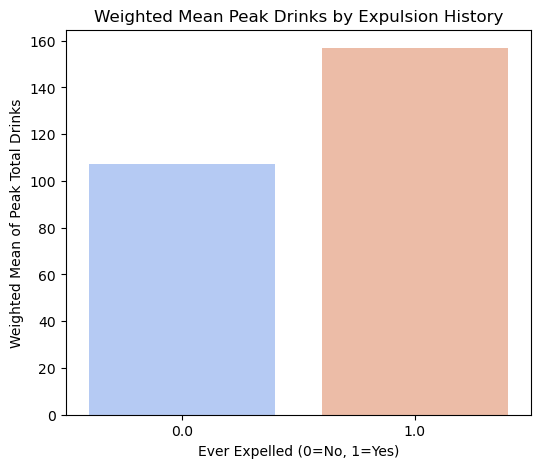

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

weighted_means = (
    temp.groupby('SchoolExpulsion')
        .apply(lambda g: np.average(g['PeakTotalDrinksIndex_upper'], weights=g['Weight']))
        .reset_index(name='WeightedMean')
)

plt.figure(figsize=(6,5))
sns.barplot(data=weighted_means, x='SchoolExpulsion', y='WeightedMean', palette='coolwarm')
plt.title('Weighted Mean Peak Drinks by Expulsion History')
plt.xlabel('Ever Expelled (0=No, 1=Yes)')
plt.ylabel('Weighted Mean of Peak Total Drinks')
plt.show()


A weighted least squares regression revealed a marginally significant association between expulsion and peak alcohol consumption, F(1,1340) = 3.56, p = .059, R² = .003. Students who had been expelled reported, on average, approximately 50 additional drinks at their lifetime peak compared with non-expelled peers (β = +49.79, SE = 26.38). Although the result falls just short of conventional significance, the direction and size of the effect are consistent with the suspension analysis and reinforce the idea that serious disciplinary sanctions are strong behavioral markers of elevated substance-use risk.

In [60]:
filtered_df['DisciplinaryIndex'] = filtered_df[['SchoolExpulsion', 'SchoolSuspension']].sum(axis=1)
filtered_df['DisciplinaryIndex'].value_counts(dropna=False)


DisciplinaryIndex
0.0    3528
1.0    1533
2.0      53
Name: count, dtype: int64

In [62]:
model = wls('PeakTotalDrinksIndex_upper ~ DisciplinaryIndex', data=filtered_df, weights=filtered_df['Weight']).fit()
print(model.summary())


                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.009
Model:                                    WLS   Adj. R-squared:                  0.009
Method:                         Least Squares   F-statistic:                     12.59
Date:                        Wed, 22 Oct 2025   Prob (F-statistic):           0.000401
Time:                                15:54:52   Log-Likelihood:                -8627.0
No. Observations:                        1344   AIC:                         1.726e+04
Df Residuals:                            1342   BIC:                         1.727e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [63]:
from statsmodels.formula.api import ols

# Drop missing to ensure clean input
temp = filtered_df.dropna(subset=['DisciplinaryIndex', 'PeakTotalDrinksIndex_upper']).copy()

# Run unweighted OLS regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ DisciplinaryIndex', data=temp).fit()

# Display summary
print(model_unweighted.summary())


                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.007
Model:                                    OLS   Adj. R-squared:                  0.006
Method:                         Least Squares   F-statistic:                     11.38
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):           0.000760
Time:                                14:28:35   Log-Likelihood:                -10153.
No. Observations:                        1602   AIC:                         2.031e+04
Df Residuals:                            1600   BIC:                         2.032e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

A combined measure of disciplinary sanctions (suspension and expulsion) was strongly associated with higher levels of peak alcohol consumption. The weighted least squares regression yielded a significant positive coefficient (β = +27.73, SE = 7.81, p < .001, R² = .009), indicating that each escalation in disciplinary severity corresponded to roughly 28 more drinks at an individual’s reported peak.
This reinforces the view that school disciplinary history is one of the most consistent behavioral indicators of elevated substance use risk.

## Family and Parental Domain

In [76]:
#parental warmth index
warmth_vars = ['H1WP9', 'H1WP10', 'H1WP13', 'H1WP14']

for v in warmth_vars:
    filtered_df[v] = filtered_df['AID'].map(df.set_index('AID')[v])
    filtered_df[v] = pd.to_numeric(filtered_df[v], errors='coerce')
    # Reverse scale (so 5 becomes 1)
    filtered_df[v] = 6 - filtered_df[v]
filtered_df['ParentalWarmth_Index'] = filtered_df[[v for v in warmth_vars]].mean(axis=1)
filtered_df['ParentalWarmth_Index'].describe()


count    4999.000000
mean        4.627726
std         0.569359
min         1.000000
25%         4.500000
50%         5.000000
75%         5.000000
max         5.000000
Name: ParentalWarmth_Index, dtype: float64

In [78]:
for v in warmth_vars:
    print(f"\n{v} value counts:")
    print(filtered_df[v].value_counts(dropna=False))



H1WP9 value counts:
H1WP9
5.0    3326
4.0     962
3.0     378
NaN     299
2.0     128
1.0      21
Name: count, dtype: int64

H1WP10 value counts:
H1WP10
5.0    4310
4.0     356
NaN     298
3.0     108
2.0      30
1.0      12
Name: count, dtype: int64

H1WP13 value counts:
H1WP13
5.0    1953
NaN    1540
4.0     944
3.0     475
2.0     140
1.0      62
Name: count, dtype: int64

H1WP14 value counts:
H1WP14
5.0    2959
NaN    1540
4.0     417
3.0     135
2.0      50
1.0      13
Name: count, dtype: int64


In [80]:
from statsmodels.formula.api import wls
import numpy as np

temp = filtered_df.dropna(subset=['ParentalWarmth_Index', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['ParentalWarmth_Index'], temp['PeakTotalDrinksIndex_upper'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Parental Warmth vs Peak Drinks): {corr:.3f}")

# Weighted regression
model = wls('PeakTotalDrinksIndex_upper ~ ParentalWarmth_Index', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Parental Warmth vs Peak Drinks): -0.017
                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.000
Model:                                    WLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                    0.3818
Date:                        Wed, 22 Oct 2025   Prob (F-statistic):              0.537
Time:                                16:10:31   Log-Likelihood:                -8432.8
No. Observations:                        1315   AIC:                         1.687e+04
Df Residuals:                            1313   BIC:                         1.688e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|    

In [65]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # for unweighted regression

# 1️⃣ Drop missing cases
temp = filtered_df.dropna(subset=['ParentalWarmth_Index', 'PeakTotalDrinksIndex_upper']).copy()

# 2️⃣ Extract variables
x = temp['ParentalWarmth_Index']
y = temp['PeakTotalDrinksIndex_upper']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Parental Warmth vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ ParentalWarmth_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Parental Warmth vs Peak Drinks): -0.054
                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.003
Model:                                    OLS   Adj. R-squared:                  0.002
Method:                         Least Squares   F-statistic:                     4.557
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):             0.0329
Time:                                14:29:14   Log-Likelihood:                -9924.1
No. Observations:                        1567   AIC:                         1.985e+04
Df Residuals:                            1565   BIC:                         1.986e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|  

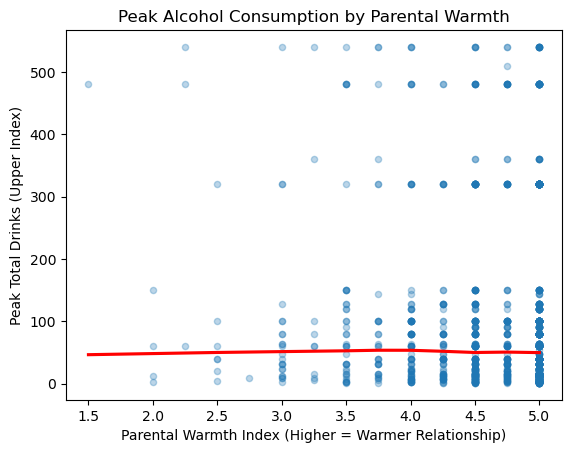

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    data=temp,
    x='ParentalWarmth_Index',
    y='PeakTotalDrinksIndex_upper',
    lowess=True,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.title('Peak Alcohol Consumption by Parental Warmth')
plt.xlabel('Parental Warmth Index (Higher = Warmer Relationship)')
plt.ylabel('Peak Total Drinks (Upper Index)')
plt.show()


Parental warmth—measured through perceived closeness and care from mother and father—was not significantly associated with adolescents’ peak alcohol consumption (β = –4.28, p = .54). Although the direction of the effect aligns with theoretical expectations (greater warmth predicting lower use), the association appears negligible once weighted for representativeness.

In [7]:
#Parental Supervision
supervision_vars = ['H1WP1', 'H1WP2', 'H1WP3', 'H1WP4', 'H1WP5', 'H1WP6', 'H1WP7']

for v in supervision_vars:
    filtered_df.loc[:, v] = pd.to_numeric(df[v], errors='coerce')
    filtered_df.loc[filtered_df[v].isin([6,7,8,9]), v] = np.nan
    filtered_df[v ] = 1 - filtered_df[v]  # Reverse so higher = more control


In [9]:
filtered_df['ParentalSupervision_Index'] = filtered_df[[v  for v in supervision_vars]].mean(axis=1)
filtered_df['ParentalSupervision_Index'].describe()


count    4998.000000
mean        0.263907
std         0.221352
min         0.000000
25%         0.142857
50%         0.285714
75%         0.428571
max         1.000000
Name: ParentalSupervision_Index, dtype: float64

In [11]:
from statsmodels.formula.api import wls
import numpy as np

temp = filtered_df.dropna(subset=['ParentalSupervision_Index', 'PeakTotalDrinksIndex_upper', 'Weight']).copy()

# Weighted correlation
x, y, w = temp['ParentalSupervision_Index'], temp['PeakTotalDrinksIndex_upper'], temp['Weight']
mean_x, mean_y = np.average(x, weights=w), np.average(y, weights=w)
cov_xy = np.average((x-mean_x)*(y-mean_y), weights=w)
corr = cov_xy / np.sqrt(np.average((x-mean_x)**2, weights=w) * np.average((y-mean_y)**2, weights=w))
print(f"Weighted correlation (Parental Supervision vs Peak Drinks): {corr:.3f}")

# Weighted regression
model = wls('PeakTotalDrinksIndex_upper ~ ParentalSupervision_Index', data=temp, weights=temp['Weight']).fit()
print(model.summary())


Weighted correlation (Parental Supervision vs Peak Drinks): -0.043
                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.002
Model:                                    WLS   Adj. R-squared:                  0.001
Method:                         Least Squares   F-statistic:                     2.401
Date:                        Fri, 24 Oct 2025   Prob (F-statistic):              0.121
Time:                                15:42:48   Log-Likelihood:                -8431.8
No. Observations:                        1315   AIC:                         1.687e+04
Df Residuals:                            1313   BIC:                         1.688e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t     

In [67]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols  # use OLS for unweighted regression

# 1️⃣ Drop missing cases
temp = filtered_df.dropna(subset=['ParentalSupervision_Index', 'PeakTotalDrinksIndex_upper']).copy()

# 2️⃣ Extract variables
x = temp['ParentalSupervision_Index']
y = temp['PeakTotalDrinksIndex_upper']

# 3️⃣ Unweighted correlation
corr_unweighted = x.corr(y)
print(f"Unweighted correlation (Parental Supervision vs Peak Drinks): {corr_unweighted:.3f}")

# 4️⃣ Unweighted regression
model_unweighted = ols('PeakTotalDrinksIndex_upper ~ ParentalSupervision_Index', data=temp).fit()
print(model_unweighted.summary())


Unweighted correlation (Parental Supervision vs Peak Drinks): -0.016
                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                    0.4094
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):              0.522
Time:                                14:29:59   Log-Likelihood:                -9920.2
No. Observations:                        1566   AIC:                         1.984e+04
Df Residuals:                            1564   BIC:                         1.986e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t   

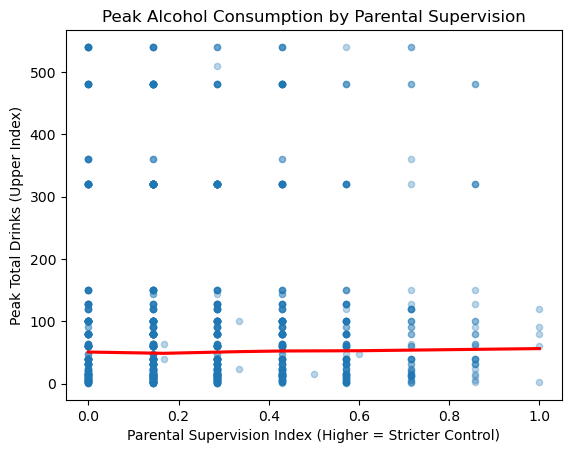

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    data=temp,
    x='ParentalSupervision_Index',
    y='PeakTotalDrinksIndex_upper',
    lowess=True,
    scatter_kws={'alpha':0.3, 's':20},
    line_kws={'color':'red'}
)
plt.title('Peak Alcohol Consumption by Parental Supervision')
plt.xlabel('Parental Supervision Index (Higher = Stricter Control)')
plt.ylabel('Peak Total Drinks (Upper Index)')
plt.show()


A weighted least-squares regression examining parental supervision and peak alcohol consumption revealed a negative but non-significant association, F(1, 1313) = 2.40, p = .12, R² = .002. Although adolescents reporting stricter parental control tended to report lower peak drinking (β = -26.29, SE = 16.97), the relationship did not reach statistical significance. These results suggest that, while supervision may be directionally protective, its independent influence on heavy episodic drinking is modest when considered in isolation.

In [71]:
from sklearn.preprocessing import StandardScaler

temp = filtered_df.dropna(subset=['ParentalWarmth_Index', 'ParentalSupervision_Index', 
                                  'PeakTotalDrinksIndex_upper', 'Weight']).copy()

scaler = StandardScaler()
scaled = scaler.fit_transform(temp[['ParentalWarmth_Index', 'ParentalSupervision_Index']])

# Assign columns separately to avoid the NotImplementedError
temp['Warmth_z'] = scaled[:, 0]
temp['Supervision_z'] = scaled[:, 1]

# Create interaction term
temp['Warmth_x_Supervision'] = temp['Warmth_z'] * temp['Supervision_z']


In [73]:
temp[['Warmth_z', 'Supervision_z', 'Warmth_x_Supervision', 'PeakTotalDrinksIndex_upper']].corr()


,Warmth_z,Supervision_z,Warmth_x_Supervision,PeakTotalDrinksIndex_upper
Warmth_z,1.000000,0.001860,0.106823,-0.042628
Supervision_z,0.001860,1.000000,-0.059307,-0.028004
Warmth_x_Supervision,0.106823,-0.059307,1.000000,-0.008934
PeakTotalDrinksIndex_upper,-0.042628,-0.028004,-0.008934,1.000000


In [24]:
from statsmodels.formula.api import wls

model = wls(
    'PeakTotalDrinksIndex_upper ~ Warmth_z + Supervision_z + Warmth_x_Supervision', 
    data=temp, weights=temp['Weight']
).fit()
print(model.summary())


                                WLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.003
Model:                                    WLS   Adj. R-squared:                  0.000
Method:                         Least Squares   F-statistic:                     1.167
Date:                        Fri, 24 Oct 2025   Prob (F-statistic):              0.321
Time:                                15:58:40   Log-Likelihood:                -8431.3
No. Observations:                        1315   AIC:                         1.687e+04
Df Residuals:                            1311   BIC:                         1.689e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
from statsmodels.formula.api import ols  # use OLS for unweighted regression

temp = filtered_df.dropna(subset=['ParentalWarmth_Index', 'ParentalSupervision_Index', 
                                  'PeakTotalDrinksIndex_upper']).copy()
scaler = StandardScaler()
scaled = scaler.fit_transform(temp[['ParentalWarmth_Index', 'ParentalSupervision_Index']])

# Assign columns separately to avoid the NotImplementedError
temp['Warmth_z'] = scaled[:, 0]
temp['Supervision_z'] = scaled[:, 1]

# Create interaction term
temp['Warmth_x_Supervision'] = temp['Warmth_z'] * temp['Supervision_z']
# 2️⃣ Run unweighted regression
model_unweighted = ols(
    'PeakTotalDrinksIndex_upper ~ Warmth_z + Supervision_z + Warmth_x_Supervision', 
    data=temp
).fit()

# 3️⃣ Display summary
print(model_unweighted.summary())


                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.003
Model:                                    OLS   Adj. R-squared:                  0.001
Method:                         Least Squares   F-statistic:                     1.659
Date:                        Sun, 26 Oct 2025   Prob (F-statistic):              0.174
Time:                                14:32:33   Log-Likelihood:                -9917.9
No. Observations:                        1566   AIC:                         1.984e+04
Df Residuals:                            1562   BIC:                         1.987e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

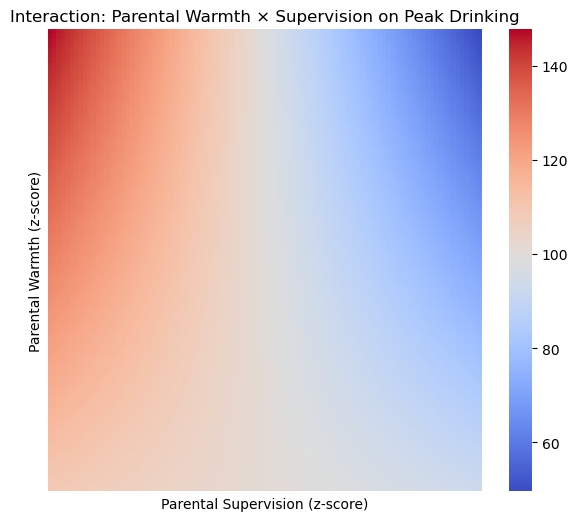

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create grid for warmth and supervision
grid_x, grid_y = np.mgrid[
    temp['Warmth_z'].min():temp['Warmth_z'].max():100j,
    temp['Supervision_z'].min():temp['Supervision_z'].max():100j
]

# Predict from model (if you ran it)
Z = model.predict(exog=dict(Warmth_z=grid_x.ravel(), 
                            Supervision_z=grid_y.ravel(),
                            Warmth_x_Supervision=(grid_x*grid_y).ravel()))
Z = Z.values.reshape(100, 100)

plt.figure(figsize=(7,6))
sns.heatmap(Z, xticklabels=False, yticklabels=False, cmap="coolwarm")
plt.title("Interaction: Parental Warmth × Supervision on Peak Drinking")
plt.xlabel("Parental Supervision (z-score)")
plt.ylabel("Parental Warmth (z-score)")
plt.show()


In [28]:
import numpy as np
import pandas as pd

temp = filtered_df.dropna(subset=[
    'ParentalWarmth_Index', 'ParentalSupervision_Index',
    'PeakTotalDrinksIndex_upper', 'Weight'
]).copy()

# Standardize warmth and supervision
temp['Warmth_z'] = (temp['ParentalWarmth_Index'] - temp['ParentalWarmth_Index'].mean()) / temp['ParentalWarmth_Index'].std()
temp['Supervision_z'] = (temp['ParentalSupervision_Index'] - temp['ParentalSupervision_Index'].mean()) / temp['ParentalSupervision_Index'].std()

# Split each variable into high/low using z=0 threshold
temp['Warmth_level'] = np.where(temp['Warmth_z'] >= 0, 'High', 'Low')
temp['Supervision_level'] = np.where(temp['Supervision_z'] >= 0, 'High', 'Low')

# Combine into 4 parenting styles
temp['ParentingStyle'] = temp['Warmth_level'] + '-' + temp['Supervision_level']
style_map = {
    'High-High': 'Authoritative',
    'High-Low': 'Permissive',
    'Low-High': 'Authoritarian',
    'Low-Low': 'Neglectful'
}
temp['ParentingStyle'] = temp['ParentingStyle'].map(style_map)

# Weighted mean Peak Drinks by Parenting Style
group_means = (
    temp.groupby('ParentingStyle')
    .apply(lambda x: np.average(x['PeakTotalDrinksIndex_upper'], weights=x['Weight']))
    .reset_index(name='WeightedMean_PeakDrinks')
    .sort_values('WeightedMean_PeakDrinks', ascending=False)
)

print(group_means)


  ParentingStyle  WeightedMean_PeakDrinks
3     Permissive               115.916770
2     Neglectful               113.082302
1  Authoritative                99.412997
0  Authoritarian                97.959752


C:\Users\pc\AppData\Local\Temp\ipykernel_5004\3820525617.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x['PeakTotalDrinksIndex_upper'], weights=x['Weight']))


Adolescents from permissive families — characterized by high warmth but low supervision — show the highest average level of peak alcohol consumption.
This pattern suggests that affection without behavioral control may unintentionally increase opportunities for experimentation and social drinking.

In contrast, authoritative and authoritarian homes, both marked by high supervision, show the lowest drinking levels, implying that parental monitoring is a more decisive protective factor than emotional warmth alone.

## Peer Domain

In [38]:
import numpy as np
import pandas as pd

# make sure the variable exists and is numeric
filtered_df['peer_alcohol_any'] = pd.to_numeric(filtered_df['peer_alcohol_any'], errors='coerce')

# replace invalid codes with NaN
filtered_df['peer_alcohol_any'] = filtered_df['peer_alcohol_any'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# create binary peer-alcohol indicator
filtered_df['peer_alcohol_any'] = np.where(filtered_df['peer_alcohol_any'] > 0, 1, 0)

# optional: verify
filtered_df[['peer_alcohol_any']].value_counts(dropna=False)


peer_alcohol_any
1                   2836
0                   2278
Name: count, dtype: int64

In [42]:
filtered_df.groupby('peer_alcohol_any')['PeakTotalDrinksIndex_upper'].mean()


peer_alcohol_any
0     95.344186
1    116.310345
Name: PeakTotalDrinksIndex_upper, dtype: float64

<Axes: xlabel='peer_alcohol_any', ylabel='PeakTotalDrinksIndex_upper'>

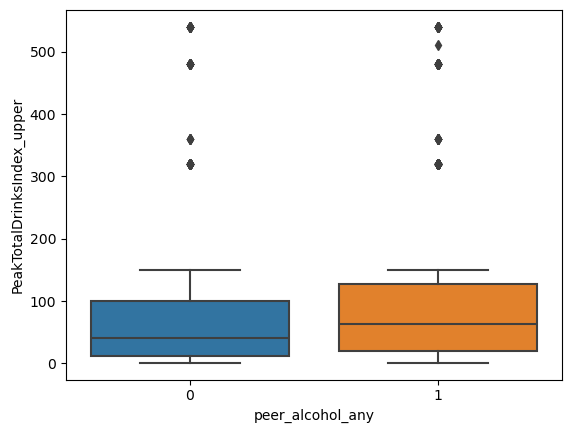

In [44]:
import seaborn as sns
sns.boxplot(data=filtered_df, x='peer_alcohol_any', y='PeakTotalDrinksIndex_upper')


<Axes: >

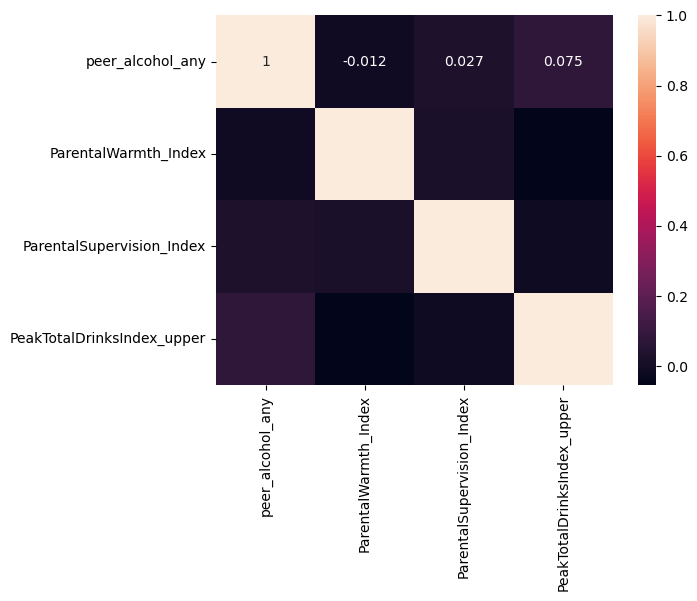

In [46]:
sns.heatmap(filtered_df[['peer_alcohol_any', 'ParentalWarmth_Index', 'ParentalSupervision_Index', 'PeakTotalDrinksIndex_upper']].corr(), annot=True)


<Axes: >

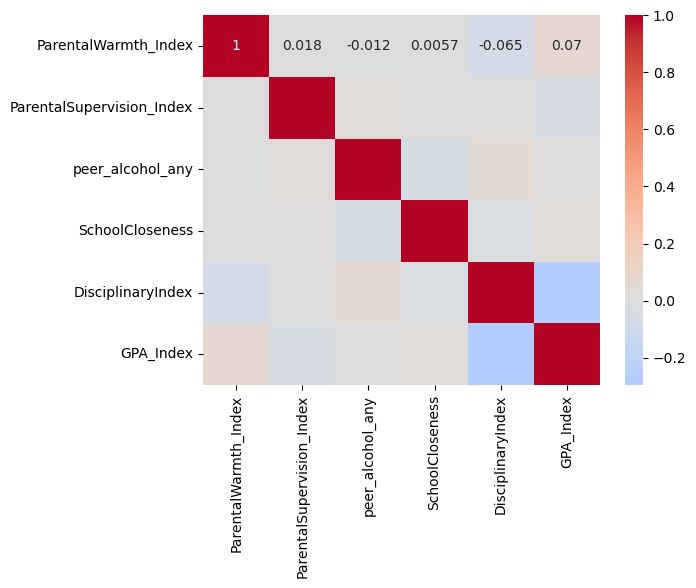

In [77]:
corr_vars = [
    'ParentalWarmth_Index', 'ParentalSupervision_Index',
    'peer_alcohol_any',
    'SchoolCloseness', 'DisciplinaryIndex', 'GPA_Index'
]

sns.heatmap(filtered_df[corr_vars].corr(), annot=True, cmap='coolwarm', center=0)


Correlation coefficients among key family, peer, and school variables were all weak (|r| < 0.1), suggesting that these domains are largely independent. The only meaningful association was a modest negative correlation between disciplinary problems and GPA, indicating that academic and behavioral difficulties co-occur to some extent. Low intercorrelations indicate minimal multicollinearity and confirm that each domain contributes distinct information for subsequent predictive modeling.

## Personal & Psychological

In [85]:
import numpy as np
import pandas as pd

# can/t shake off blues despite help from family
filtered_df['BluesInspiteOfHelp'] = pd.to_numeric(df['H1FS3'], errors='coerce')

# Replace special codes (6, 8, 9 if any) with NaN
filtered_df['BluesInspiteOfHelp'] = filtered_df['BluesInspiteOfHelp'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Verify distribution
print(filtered_df['BluesInspiteOfHelp'].value_counts(dropna=False).sort_index())


BluesInspiteOfHelp
0.0    3661
1.0    1023
2.0     295
3.0     122
NaN      13
Name: count, dtype: int64


In [88]:
# you feel less than others
filtered_df['LessThanOthers'] = pd.to_numeric(df['H1FS4'], errors='coerce')
filtered_df['LessThanOthers'] = filtered_df['LessThanOthers'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Reverse code (0–3 scale)
# Higher original = more self-worth → reverse to make higher = more depressed
filtered_df['LessThanOthers'] = 3 - filtered_df['LessThanOthers']


print("\nReversed:")
print(filtered_df['LessThanOthers'].value_counts(dropna=False).sort_index())



Reversed:
LessThanOthers
0.0    1856
1.0    1635
2.0    1048
3.0     563
NaN      12
Name: count, dtype: int64


In [102]:
#when were you happy? 0 for always 3 for rarely
# Clean and recode H1FS11
filtered_df['Unhappy'] = pd.to_numeric(df['H1FS11'], errors='coerce')
filtered_df['Unhappy'] = filtered_df['Unhappy'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Reverse code: 0–3 → 3–0 (higher = more depressed)
filtered_df['Unhappy'] = 3 - filtered_df['Unhappy']


print("\nReversed:")
print(filtered_df['Unhappy'].value_counts(dropna=False).sort_index())



Reversed:
Unhappy
0.0    1878
1.0    2142
2.0     955
3.0     129
NaN      10
Name: count, dtype: int64


In [92]:
#lonely
# Clean and recode H1FS13
filtered_df['Lonely'] = pd.to_numeric(df['H1FS13'], errors='coerce')
filtered_df['Lonely'] = filtered_df['Lonely'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(filtered_df['Lonely'].value_counts(dropna=False).sort_index())


Lonely
0.0    3250
1.0    1426
2.0     311
3.0     115
NaN      12
Name: count, dtype: int64


In [94]:
# People unfriendly to you
filtered_df['UnfriendlyPeople'] = pd.to_numeric(df['H1FS14'], errors='coerce')
filtered_df['UnfriendlyPeople'] = filtered_df['UnfriendlyPeople'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(filtered_df['UnfriendlyPeople'].value_counts(dropna=False).sort_index())


UnfriendlyPeople
0.0    3390
1.0    1444
2.0     204
3.0      67
NaN       9
Name: count, dtype: int64


In [96]:
# you feel it's hard to start things
filtered_df['HardToStart'] = pd.to_numeric(df['H1FS18'], errors='coerce')
filtered_df['HardToStart'] = filtered_df['HardToStart'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(filtered_df['HardToStart'].value_counts(dropna=False).sort_index())


HardToStart
0.0    2454
1.0    2224
2.0     360
3.0      62
NaN      14
Name: count, dtype: int64


In [98]:
# Ever felt life wasn't worth living?
filtered_df['NotWorthLiving'] = pd.to_numeric(df['H1FS19'], errors='coerce')
filtered_df['NotWorthLiving'] = filtered_df['NotWorthLiving'].replace({6: np.nan, 8: np.nan, 9: np.nan})

# Check distribution
print(filtered_df['NotWorthLiving'].value_counts(dropna=False).sort_index())


NotWorthLiving
0.0    4497
1.0     434
2.0     117
3.0      56
NaN      10
Name: count, dtype: int64


In [104]:
#drinking averages for each variable
depression_vars = [
    'BluesInspiteOfHelp',   # Could not shake off the blues
    'LessThanOthers',     # Felt just as good as others (reversed)
    'Unhappy',    # Were happy (reversed)
    'Lonely',  # Felt lonely
    'UnfriendlyPeople',  # People unfriendly
    'HardToStart',  # Hard to get started
    'NotWorthLiving'   # Life not worth living
]

results = []

for var in depression_vars:
    temp = filtered_df.dropna(subset=[var, 'PeakTotalDrinksIndex_upper'])
    group_means = temp.groupby(var)['PeakTotalDrinksIndex_upper'].mean()
    results.append(group_means)

# Combine results into a single DataFrame for easy comparison
mean_table = pd.concat(results, axis=1)
mean_table.columns = depression_vars

print(mean_table.round(2))


     BluesInspiteOfHelp  LessThanOthers  Unhappy  Lonely  UnfriendlyPeople  \
0.0              106.73          102.63   104.52  107.31            106.88   
1.0              115.20          111.45   110.01  110.25            110.86   
2.0              108.65          110.12   114.51  112.99             98.87   
3.0               86.00          112.11    72.74   90.59            138.33   

     HardToStart  NotWorthLiving  
0.0       101.20          107.53  
1.0       114.39          109.28  
2.0       112.50          117.82  
3.0       125.43          118.00  


The results show that adolescents reporting moderate depressive symptoms generally have higher peak drinking levels than those with little or no symptoms, suggesting that alcohol may be used as a coping mechanism for emotional distress. However, at the highest levels of depression, average drinking often declines, likely reflecting social withdrawal or loss of interest. Among the indicators, low self-esteem, difficulty getting started, and feelings that life is not worth living show the strongest and most consistent associations with heavier alcohol use.

In [107]:
import numpy as np
import pandas as pd

# Your psychological variable names
psych_vars = [
    'BluesInspiteOfHelp', 
    'LessThanOthers', 
    'Unhappy', 
    'Lonely', 
    'UnfriendlyPeople', 
    'HardToStart', 
    'NotWorthLiving'
]

# Drop missing cases for alpha calculation
psych_df = filtered_df[psych_vars].dropna()

# Compute Cronbach's alpha
k = len(psych_vars)
item_variances = psych_df.var(axis=0, ddof=1)
total_variance = psych_df.sum(axis=1).var(ddof=1)
cronbach_alpha = (k / (k - 1)) * (1 - item_variances.sum() / total_variance)

print(f"Cronbach’s alpha for psychological variables: {cronbach_alpha:.3f}")


Cronbach’s alpha for psychological variables: 0.678


                    BluesInspiteOfHelp  LessThanOthers  Unhappy  Lonely  \
BluesInspiteOfHelp                1.00            0.20     0.32    0.46   
LessThanOthers                    0.20            1.00     0.34    0.18   
Unhappy                           0.32            0.34     1.00    0.30   
Lonely                            0.46            0.18     0.30    1.00   
UnfriendlyPeople                  0.20            0.13     0.15    0.27   
HardToStart                       0.26            0.11     0.18    0.27   
NotWorthLiving                    0.36            0.22     0.25    0.32   

                    UnfriendlyPeople  HardToStart  NotWorthLiving  
BluesInspiteOfHelp              0.20         0.26            0.36  
LessThanOthers                  0.13         0.11            0.22  
Unhappy                         0.15         0.18            0.25  
Lonely                          0.27         0.27            0.32  
UnfriendlyPeople                1.00         0.22          

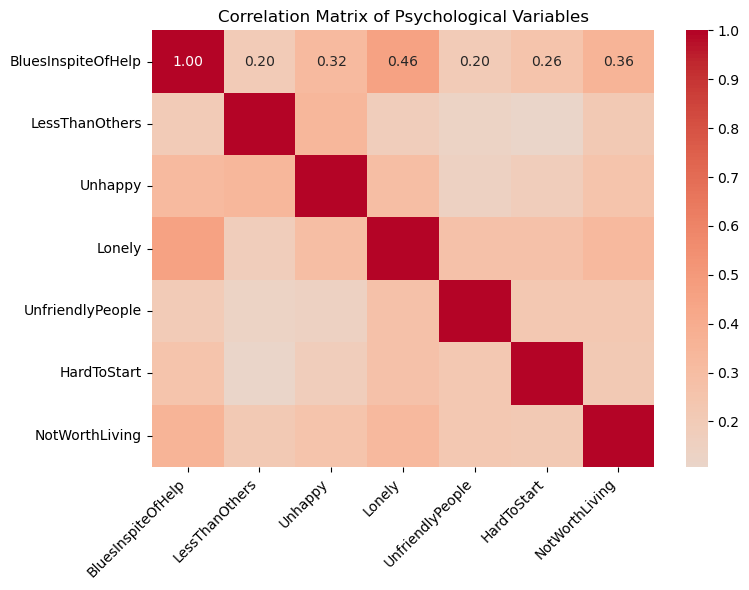

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset dataframe for psychological variables
psych_vars = [
    'BluesInspiteOfHelp', 
    'LessThanOthers', 
    'Unhappy', 
    'Lonely', 
    'UnfriendlyPeople', 
    'HardToStart', 
    'NotWorthLiving'
]

psych_corr = filtered_df[psych_vars].corr()

# Display correlation matrix
print(psych_corr.round(2))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(psych_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix of Psychological Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [111]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# List of psychological variables
psych_vars = [
    'BluesInspiteOfHelp', 
    'LessThanOthers', 
    'Unhappy', 
    'Lonely', 
    'UnfriendlyPeople', 
    'HardToStart', 
    'NotWorthLiving'
]

# Compute the mean score (ignore missing values)
filtered_df['Depression_Index_raw'] = filtered_df[psych_vars].mean(axis=1, skipna=True)

# Standardize (z-score)
scaler = StandardScaler()
filtered_df['Depression_Index'] = scaler.fit_transform(filtered_df[['Depression_Index_raw']])

# Quick summary
print(filtered_df['Depression_Index'].describe())


count    5.106000e+03
mean    -8.349503e-18
std      1.000098e+00
min     -1.325385e+00
25%     -6.575928e-01
50%     -3.236969e-01
75%      3.440951e-01
max      5.352535e+00
Name: Depression_Index, dtype: float64


                            Depression_Index  ParentalWarmth_Index  \
Depression_Index                        1.00                 -0.32   
ParentalWarmth_Index                   -0.32                  1.00   
ParentalSupervision_Index               0.04                 -0.01   
SchoolTrouble_Index                     0.31                 -0.15   
SchoolCloseness                         0.04                  0.01   
SchoolSuspension                        0.15                 -0.08   
SchoolExpulsion                         0.02                 -0.06   
LowReligiousImportance                  0.03                 -0.06   
PeakTotalDrinksIndex_upper              0.02                 -0.04   

                            ParentalSupervision_Index  SchoolTrouble_Index  \
Depression_Index                                 0.04                 0.31   
ParentalWarmth_Index                            -0.01                -0.15   
ParentalSupervision_Index                        1.00            

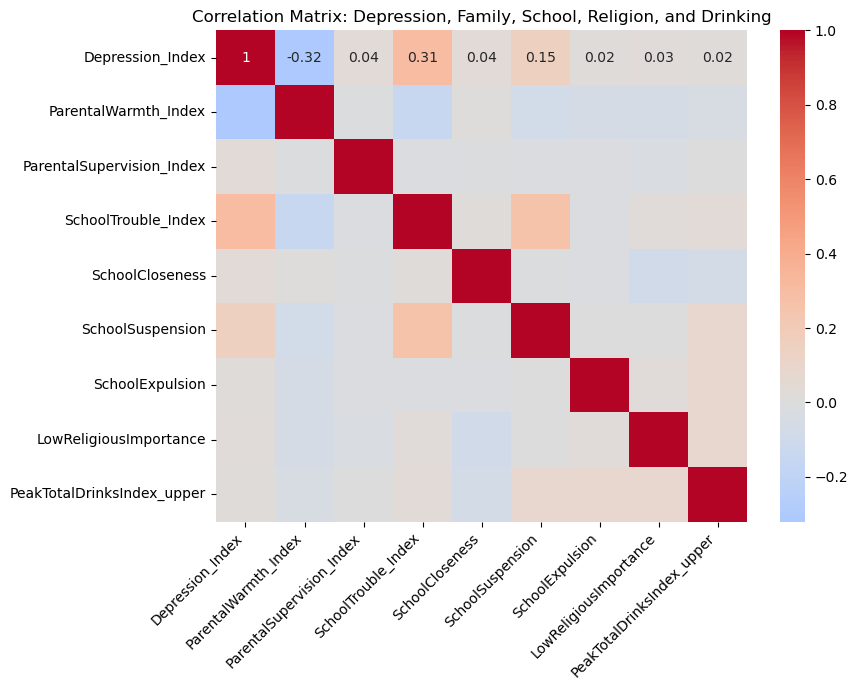

In [20]:
# Select relevant variables for analysis
core_indices = [
    'Depression_Index',
    'ParentalWarmth_Index',
    'ParentalSupervision_Index',
    'SchoolTrouble_Index',
    'SchoolCloseness',
    'SchoolSuspension',
    'SchoolExpulsion',
    'LowReligiousImportance',
    'PeakTotalDrinksIndex_upper'
]

# Subset and drop missing rows for pairwise correlations
corr_df = filtered_df[core_indices].dropna()

# Compute correlation matrix
corr_matrix = corr_df.corr().round(2)
print(corr_matrix)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Depression, Family, School, Religion, and Drinking')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The results reveal a strong protective effect of parental warmth and a risk association between school-related troubles and depression. Other contextual variables (supervision, religiosity, and drinking behavior) show negligible direct relationships with depressive symptoms, suggesting that emotional well-being in adolescence is most closely tied to family support and school adjustment rather than behavioral control or religious engagement.

In [22]:
#test joint variance explanation potential
import statsmodels.api as sm

predictors = [
    'ParentalWarmth_Index',
    'ParentalSupervision_Index',
    'SchoolTrouble_Index',
    'SchoolCloseness',
    'SchoolSuspension',
    'SchoolExpulsion',
    'LowReligiousImportance',
    'Depression_Index'
]

temp = filtered_df.dropna(subset=predictors + ['PeakTotalDrinksIndex_upper']).copy()

X = temp[predictors]
y = temp['PeakTotalDrinksIndex_upper']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     PeakTotalDrinksIndex_upper   R-squared:                       0.024
Model:                                    OLS   Adj. R-squared:                  0.018
Method:                         Least Squares   F-statistic:                     3.957
Date:                        Tue, 28 Oct 2025   Prob (F-statistic):           0.000122
Time:                                10:10:00   Log-Likelihood:                -8362.5
No. Observations:                        1321   AIC:                         1.674e+04
Df Residuals:                            1312   BIC:                         1.679e+04
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

The combined model shows that school environment and religiosity are the most meaningful predictors of adolescent drinking behavior, while family warmth, supervision, and psychological distress have weaker direct effects. Specifically, stronger school connectedness and greater religious importance are associated with lower peak drinking, whereas school expulsion is strongly linked to higher drinking levels.
Although the explained variance is modest (R² = 0.024), the overall F-test confirms that these domains collectively possess predictive potential, highlighting the central role of school adjustment and value systems in shaping alcohol-related risk.

## Motivations to Engage in Risky Sexual Behaviors

In [60]:
# List of relevant variables from Section 17
motivation_vars = [
    'H1MO1','H1MO3','H1MO4','H1MO5','H1MO6',
    'H1MO7','H1MO8','H1MO13'
]

# Section 17 variables
motivation_vars = [
    'H1MO1','H1MO3','H1MO4','H1MO5','H1MO6',
    'H1MO7','H1MO8','H1MO13'
]

# Ensure 'AID' exists and is consistent
if 'AID' not in filtered_df.columns:
    raise KeyError("AID not found in filtered_df")
if 'AID' not in df.columns:
    raise KeyError("AID not found in df")

# Make sure AID types are the same
filtered_df['AID'] = filtered_df['AID'].astype(str)
df['AID'] = df['AID'].astype(str)

# Identify missing vars
missing_vars = [v for v in motivation_vars if v not in filtered_df.columns]

if missing_vars:
    print(f"Adding {len(missing_vars)} missing variables:", missing_vars)
    
    # Subset df with relevant vars
    temp = df[['AID'] + missing_vars].drop_duplicates(subset='AID')
    
    # Merge safely with suffix protection
    filtered_df = filtered_df.merge(temp, on='AID', how='left', validate='one_to_one')
    
    # Confirm they were added
    print("After merge, found variables:", [v for v in motivation_vars if v in filtered_df.columns])
else:
    print("All motivation variables already present in filtered_df.")



Adding 7 missing variables: ['H1MO3', 'H1MO4', 'H1MO5', 'H1MO6', 'H1MO7', 'H1MO8', 'H1MO13']
After merge, found variables: ['H1MO1', 'H1MO3', 'H1MO4', 'H1MO5', 'H1MO6', 'H1MO7', 'H1MO8', 'H1MO13']


In [62]:
# Convert to numeric safely
for var in motivation_vars:
    filtered_df[var] = pd.to_numeric(filtered_df[var], errors='coerce')
